# Please jump to the Key Takeaways section at the end for the results.


## Data Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load Packages #

import os

import pandas as pd

import numpy as np
import csv
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
nielsen_reach = pd.read_csv("/content/drive/MyDrive/DSCI599/Entertainment Dataset/Nielsen Dataset/Reach Data 2016 to 2020.csv")
nielsen_share = pd.read_csv("/content/drive/MyDrive/DSCI599/Entertainment Dataset/Nielsen Dataset/Share Data 2016 to 2020.csv")


<ipython-input-21-20e4ed951831>:2: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  nielsen_share = pd.read_csv("/content/drive/MyDrive/DSCI599/Entertainment Dataset/Nielsen Dataset/Share Data 2016 to 2020.csv")


In [ ]:
stream_amazon = pd.read_excel("/content/drive/MyDrive/DSCI599/Entertainment Dataset/Streaming Dataset/Amazon Prime (excluding Amazon Other) catalogue USA 2016-2020.xlsx")

In [ ]:
stream_hulu = pd.read_excel("/content/drive/MyDrive/DSCI599/Entertainment Dataset/Streaming Dataset/Hulu catalogue USA 2016-2020.xlsx")

In [ ]:
stream_netflix = pd.read_excel("/content/drive/MyDrive/DSCI599/Entertainment Dataset/Streaming Dataset/Netflix catalogue USA 2016-2020.xlsx")


In [ ]:
stream_amazon.columns

Index(['YearMonth', 'Platform', 'Country', 'Content Type', 'Title',
       'First Release Year', 'Primary Genre', 'SecondaryGenre', 'Genre',
       'Duration', 'Duration Group', 'Number of Episodes',
       'Primary Production Country', 'Primary Production Company'],
      dtype='object')

In [ ]:
stream_hulu.columns

Index(['YearMonth', 'Platform', 'Country', 'Content Type', 'Title',
       'First Release Year', 'Primary Genre', 'SecondaryGenre', 'Genre',
       'Duration', 'Duration Group', 'Number of Episodes',
       'Primary Production Country', 'Primary Production Company'],
      dtype='object')

In [ ]:
stream_netflix.columns

Index(['YearMonth', 'Platform', 'Country', 'Content Type', 'Title',
       'First Release Year', 'Primary Genre', 'SecondaryGenre', 'Genre',
       'Duration', 'Duration Group', 'Number of Episodes',
       'Primary Production Country', 'Primary Production Company'],
      dtype='object')

In [ ]:
stream_amazon['platform'] = 'amazon'
stream_hulu['platform'] = 'hulu'
stream_netflix['platform'] = 'netflix'

merged_dataframe = pd.concat([stream_amazon, stream_hulu, stream_netflix], ignore_index=True)

merged_dataframe.head(5)

,YearMonth,Platform,Country,Content Type,Title,First Release Year,Primary Genre,SecondaryGenre,Genre,Duration,Duration Group,Number of Episodes,Primary Production Country,Primary Production Company,platform
0,Jan-2016,Amazon Prime Video,USA,Movie,...and the Earth Did Not Swallow Him,1995,Drama,Miscellaneous,Drama - Miscellaneous,99,90 - 120 minutes,-,USA,kino international,amazon
1,Jan-2016,Amazon Prime Video,USA,Movie,'neath Brooklyn Bridge,1942,Romance,Drama,Romance - Drama,61,60 - 90 minutes,-,USA,Sam Katzman Productions,amazon
2,Jan-2016,Amazon Prime Video,USA,Movie,"""blue Lamp, The""",[Not given],Action & Adventure,Drama,Action & Adventure - Drama,-,No Group,-,USA,Viacom,amazon
3,Jan-2016,Amazon Prime Video,USA,Movie,"""shostakovich, Lady Macbeth of Mtsensk - Eva-m...",2015,Entertainment,Music,Entertainment - Music,165,150 - 180 minutes,-,No Country Assigned,Der Nederlandse Opera,amazon
4,Jan-2016,Amazon Prime Video,USA,Movie,#lucky Number,2015,Romance,Comedy,Romance - Comedy,79,60 - 90 minutes,-,USA,36films,amazon


In [ ]:
nielsen_reach.columns

Index(['Unnamed: 0', 'Coverage Area', 'Market Break', 'Demographic',
       'Schedule Name', 'Date', 'Originator', 'Program', 'Playback Period',
       'Units', 'AA Reach%', 'AA Reach Proj(units)', 'AA Average Frequency',
       'AA Average Minutes', 'Spot AA GRP%', 'Qualified AA GRP%',
       'Spot AA GRP Proj(units)', 'Qualified AA GRP Proj(units)',
       'AA Effective Reach(3+)', 'Weighted Intab', 'PESS', 'Unified Count',
       'UE (000)', 'UE/Proj Type', 'File'],
      dtype='object')

In [ ]:
nielsen_share.columns

Index(['Unnamed: 0', 'Coverage Area', 'Market Break', 'Demographic',
       'Broadcast Date', 'Originator', 'Program Name',
       'Telecast Report Start Time', 'Summary Type Code', 'Playback Period',
       'Total Duration', 'MC US AA %', 'MC US AA Proj (units)',
       'MC US Share AA %', 'MC US HUT %', 'MC US HUT Proj (units)',
       'Rating Base', 'MC Weighted Viewing AA Minutes', 'MC DTVR', 'PESS',
       'Avg Intab', 'Avg Scaled Intab', 'Avg Scaled Installed', 'UE (000)',
       'UE Type', 'File'],
      dtype='object')

In [ ]:
nielsen_share.head(5)

,Unnamed: 0,Coverage Area,Market Break,Demographic,Broadcast Date,Originator,Program Name,Telecast Report Start Time,Summary Type Code,Playback Period,...,Rating Base,MC Weighted Viewing AA Minutes,MC DTVR,PESS,Avg Intab,Avg Scaled Intab,Avg Scaled Installed,UE (000),UE Type,File
0,0,Total US,Composite,Persons 2 - 99,2017-01-01,ABC,AMER FUNN HOME VIDEOS,19:00:00,COMEDY VARIETY,Live+7 Days (+168 Hours) | TV with Digital | L...,...,3.016700e+08,3.775582e+08,"C,M",65696,100197,36246,39699,301670,S,USC Marshall 2017 v2S.xlsx
1,1,Total US,Composite,Persons 2 - 99,2017-01-01,ABC,CONVICTION,22:00:00,GENERAL DRAMA,Live+7 Days (+168 Hours) | TV with Digital | L...,...,3.016700e+08,2.405016e+08,"C,M",65696,100197,36246,39699,301670,S,USC Marshall 2017 v2S.xlsx
2,2,Total US,Composite,Persons 2 - 99,2017-01-01,AMC,WALKING DEAD MARATHON,19:10:00,GENERAL DRAMA,Live+7 Days (+168 Hours) | TV with Digital | L...,...,3.016700e+08,4.448191e+07,"C,M",65696,100197,36246,39699,301670,S,USC Marshall 2017 v2S.xlsx
3,3,Total US,Composite,Persons 2 - 99,2017-01-01,AMC,WALKING DEAD MARATHON,20:10:00,GENERAL DRAMA,Live+7 Days (+168 Hours) | TV with Digital | L...,...,3.016700e+08,6.965312e+07,"C,M",65696,100197,36246,39699,301670,S,USC Marshall 2017 v2S.xlsx
4,4,Total US,Composite,Persons 2 - 99,2017-01-01,AMC,WALKING DEAD MARATHON,21:35:00,GENERAL DRAMA,Live+7 Days (+168 Hours) | TV with Digital | L...,...,3.016700e+08,4.549348e+07,"C,M",65696,100197,36246,39699,301670,S,USC Marshall 2017 v2S.xlsx


In [ ]:
nielsen_reach.head(5)

,Unnamed: 0,Coverage Area,Market Break,Demographic,Schedule Name,Date,Originator,Program,Playback Period,Units,...,Qualified AA GRP%,Spot AA GRP Proj(units),Qualified AA GRP Proj(units),AA Effective Reach(3+),Weighted Intab,PESS,Unified Count,UE (000),UE/Proj Type,File
0,0,Total US,Composite,Persons 2 - 99,USC Marshall Reach 2018 v1,01/01/2018,COMEDY CENTRAL,CHAPPELLES SHOW,Live+7 Days (+168 Hours) | TV with Digital | L...,6,...,1.086498,68015665,3311940,0.143063,304499468,43551,73452,304827,S,USC Marshall Reach 2018 v1.xlsx
1,1,Total US,Composite,Persons 2 - 99,USC Marshall Reach 2018 v1,01/01/2018,AMC,BREAKING BAD MARATHON,Live+7 Days (+168 Hours) | TV with Digital | L...,2,...,0.386566,47466710,1178358,0.004686,304499468,43551,73452,304827,S,USC Marshall Reach 2018 v1.xlsx
2,2,Total US,Composite,Persons 2 - 99,USC Marshall Reach 2018 v1,01/01/2018,CBS,"BIG BANG THEORY, THE-1/1",Live+7 Days (+168 Hours) | TV with Digital | L...,1,...,2.116748,151299653,6452420,0.000407,304499468,43551,73452,304827,S,USC Marshall Reach 2018 v1.xlsx
3,3,Total US,Composite,Persons 2 - 99,USC Marshall Reach 2018 v1,01/01/2018,NBC,BETTER LATE THAN NEVER,Live+7 Days (+168 Hours) | TV with Digital | L...,1,...,2.137488,253579666,6515641,0.004577,304499468,43551,73452,304827,S,USC Marshall Reach 2018 v1.xlsx
4,4,Total US,Composite,Persons 2 - 99,USC Marshall Reach 2018 v1,01/01/2018,CBS,YOUNG SHELDON 830PM-SP,Live+7 Days (+168 Hours) | TV with Digital | L...,1,...,1.938229,147864817,5908244,0.000000,304499468,43551,73452,304827,S,USC Marshall Reach 2018 v1.xlsx


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Unnamed: 0'].plot(kind='hist', bins=20, title='Unnamed: 0')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Units'].plot(kind='hist', bins=20, title='Units')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['AA Reach%'].plot(kind='hist', bins=20, title='AA Reach%')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('Originator').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('Program').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='index', y='Unnamed: 0', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Unnamed: 0', y='Units', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='Units', y='AA Reach%', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9.plot(kind='scatter', x='AA Reach%', y='AA Reach Proj(units)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Units']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Originator')):
  _plot_series(series, series_name, i)
  fig.legend(title='Originator', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Units')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Units']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Program')):
  _plot_series(series, series_name, i)
  fig.legend(title='Program', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Units')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['AA Reach%']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Originator')):
  _plot_series(series, series_name, i)
  fig.legend(title='Originator', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('AA Reach%')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['AA Reach%']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_13.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Program')):
  _plot_series(series, series_name, i)
  fig.legend(title='Program', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('AA Reach%')

from matplotlib import pyplot as plt
_df_14['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['Unnamed: 0'].plot(kind='line', figsize=(8, 4), title='Unnamed: 0')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_16['Units'].plot(kind='line', figsize=(8, 4), title='Units')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_17['AA Reach%'].plot(kind='line', figsize=(8, 4), title='AA Reach%')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Program'].value_counts()
    for x_label, grp in _df_18.groupby('Originator')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Originator')
_ = plt.ylabel('Program')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_19['Originator'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_19, x='index', y='Originator', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_20['Program'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_20, x='index', y='Program', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_21['Originator'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_21, x='Unnamed: 0', y='Originator', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_22['Program'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_22, x='Unnamed: 0', y='Program', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

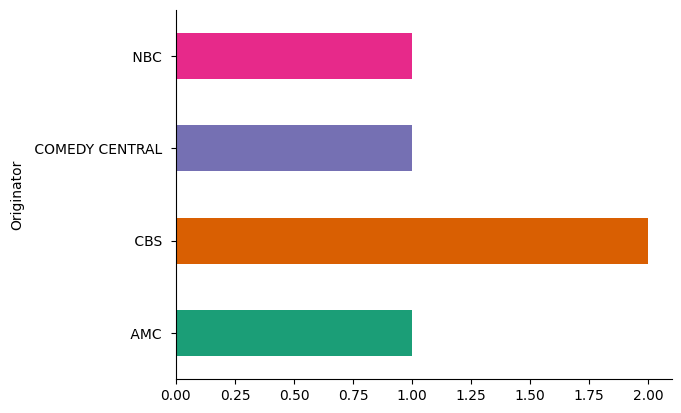

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('Originator').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
len(nielsen_reach),len(nielsen_share)

(174889, 267927)

In [ ]:
nielsen_reach.rename(columns={'Program': 'Program Name'}, inplace=True)

# Print the updated dataframe
nielsen_reach.head(5)

,Unnamed: 0,Coverage Area,Market Break,Demographic,Schedule Name,Date,Originator,Program Name,Playback Period,Units,...,Qualified AA GRP%,Spot AA GRP Proj(units),Qualified AA GRP Proj(units),AA Effective Reach(3+),Weighted Intab,PESS,Unified Count,UE (000),UE/Proj Type,File
0,0,Total US,Composite,Persons 2 - 99,USC Marshall Reach 2018 v1,01/01/2018,COMEDY CENTRAL,CHAPPELLES SHOW,Live+7 Days (+168 Hours) | TV with Digital | L...,6,...,1.086498,68015665,3311940,0.143063,304499468,43551,73452,304827,S,USC Marshall Reach 2018 v1.xlsx
1,1,Total US,Composite,Persons 2 - 99,USC Marshall Reach 2018 v1,01/01/2018,AMC,BREAKING BAD MARATHON,Live+7 Days (+168 Hours) | TV with Digital | L...,2,...,0.386566,47466710,1178358,0.004686,304499468,43551,73452,304827,S,USC Marshall Reach 2018 v1.xlsx
2,2,Total US,Composite,Persons 2 - 99,USC Marshall Reach 2018 v1,01/01/2018,CBS,"BIG BANG THEORY, THE-1/1",Live+7 Days (+168 Hours) | TV with Digital | L...,1,...,2.116748,151299653,6452420,0.000407,304499468,43551,73452,304827,S,USC Marshall Reach 2018 v1.xlsx
3,3,Total US,Composite,Persons 2 - 99,USC Marshall Reach 2018 v1,01/01/2018,NBC,BETTER LATE THAN NEVER,Live+7 Days (+168 Hours) | TV with Digital | L...,1,...,2.137488,253579666,6515641,0.004577,304499468,43551,73452,304827,S,USC Marshall Reach 2018 v1.xlsx
4,4,Total US,Composite,Persons 2 - 99,USC Marshall Reach 2018 v1,01/01/2018,CBS,YOUNG SHELDON 830PM-SP,Live+7 Days (+168 Hours) | TV with Digital | L...,1,...,1.938229,147864817,5908244,0.000000,304499468,43551,73452,304827,S,USC Marshall Reach 2018 v1.xlsx


In [ ]:
joined_df = pd.merge(nielsen_reach, nielsen_share, how='inner', on='Program Name')

In [ ]:
len(joined_df)

256036

In [ ]:
joined_df.columns

Index(['Unnamed: 0_x', 'Coverage Area_x', 'Market Break_x', 'Demographic_x',
       'Schedule Name', 'Date', 'Originator_x', 'Program Name',
       'Playback Period_x', 'Units', 'AA Reach%', 'AA Reach Proj(units)',
       'AA Average Frequency', 'AA Average Minutes', 'Spot AA GRP%',
       'Qualified AA GRP%', 'Spot AA GRP Proj(units)',
       'Qualified AA GRP Proj(units)', 'AA Effective Reach(3+)',
       'Weighted Intab', 'PESS_x', 'Unified Count', 'UE (000)_x',
       'UE/Proj Type', 'File_x', 'Unnamed: 0_y', 'Coverage Area_y',
       'Market Break_y', 'Demographic_y', 'Broadcast Date', 'Originator_y',
       'Telecast Report Start Time', 'Summary Type Code', 'Playback Period_y',
       'Total Duration', 'MC US AA %', 'MC US AA Proj (units)',
       'MC US Share AA %', 'MC US HUT %', 'MC US HUT Proj (units)',
       'Rating Base', 'MC Weighted Viewing AA Minutes', 'MC DTVR', 'PESS_y',
       'Avg Intab', 'Avg Scaled Intab', 'Avg Scaled Installed', 'UE (000)_y',
       'UE Type', 'F

In [ ]:
joined_df.head(5)

,Unnamed: 0_x,Coverage Area_x,Market Break_x,Demographic_x,Schedule Name,Date,Originator_x,Program Name,Playback Period_x,Units,...,Rating Base,MC Weighted Viewing AA Minutes,MC DTVR,PESS_y,Avg Intab,Avg Scaled Intab,Avg Scaled Installed,UE (000)_y,UE Type,File_y
0,39,Total US,Composite,Persons 2 - 99,USC Marshall Reach 2018 v1,01/03/2018,FOX,911,Live+7 Days (+168 Hours) | TV with Digital | L...,1,...,3.054400e+08,6.309665e+08,"C,M",70196,110012,37585,39917,305440,S,USC Marshall 2019 v2S.xlsx
1,39,Total US,Composite,Persons 2 - 99,USC Marshall Reach 2018 v1,01/03/2018,FOX,911,Live+7 Days (+168 Hours) | TV with Digital | L...,1,...,3.054400e+08,5.906170e+08,"C,M",70442,110090,37605,39895,305440,S,USC Marshall 2019 v2S.xlsx
2,39,Total US,Composite,Persons 2 - 99,USC Marshall Reach 2018 v1,01/03/2018,FOX,911,Live+7 Days (+168 Hours) | TV with Digital | L...,1,...,3.054400e+08,6.156598e+08,"C,M",70144,110166,37504,39895,305440,S,USC Marshall 2019 v2S.xlsx
3,39,Total US,Composite,Persons 2 - 99,USC Marshall Reach 2018 v1,01/03/2018,FOX,911,Live+7 Days (+168 Hours) | TV with Digital | L...,1,...,3.054400e+08,5.938420e+08,"C,M",70260,110456,37579,40036,305440,S,USC Marshall 2019 v2S.xlsx
4,39,Total US,Composite,Persons 2 - 99,USC Marshall Reach 2018 v1,01/03/2018,FOX,911,Live+7 Days (+168 Hours) | TV with Digital | L...,1,...,3.054400e+08,5.977337e+08,"C,M",70570,110551,37734,40137,305440,S,USC Marshall 2019 v2S.xlsx


In [ ]:
stream=merged_dataframe.copy()
tv=joined_df.copy()

In [ ]:
stream.to_csv("/content/drive/MyDrive/DSCI599/streamdata.csv",index=False)

In [ ]:
print(stream.isnull().sum())
print(tv.isnull().sum())
#print(share_data.isnull().sum())

YearMonth                     0
Platform                      0
Country                       0
Content Type                  0
Title                         0
First Release Year            0
Primary Genre                 0
SecondaryGenre                0
Genre                         0
Duration                      0
Duration Group                0
Number of Episodes            0
Primary Production Country    0
Primary Production Company    0
platform                      0
dtype: int64
Unnamed: 0_x                           0
Coverage Area_x                        0
Market Break_x                         0
Demographic_x                          0
Schedule Name                          0
Date                                   0
Originator_x                           0
Program Name                           0
Playback Period_x                      0
Units                                  0
AA Reach%                              0
AA Reach Proj(units)                   0
AA Average Freq

In [ ]:
nielsen_reach.isnull().sum()

Unnamed: 0                      0
Coverage Area                   0
Market Break                    0
Demographic                     0
Schedule Name                   0
Date                            0
Originator                      0
Program Name                    0
Playback Period                 0
Units                           0
AA Reach%                       0
AA Reach Proj(units)            0
AA Average Frequency            0
AA Average Minutes              0
Spot AA GRP%                    0
Qualified AA GRP%               0
Spot AA GRP Proj(units)         0
Qualified AA GRP Proj(units)    0
AA Effective Reach(3+)          0
Weighted Intab                  0
PESS                            0
Unified Count                   0
UE (000)                        0
UE/Proj Type                    0
File                            0
dtype: int64

In [ ]:
nielsen_share.columns

Index(['Unnamed: 0', 'Coverage Area', 'Market Break', 'Demographic',
       'Broadcast Date', 'Originator', 'Program Name',
       'Telecast Report Start Time', 'Summary Type Code', 'Playback Period',
       'Total Duration', 'MC US AA %', 'MC US AA Proj (units)',
       'MC US Share AA %', 'MC US HUT %', 'MC US HUT Proj (units)',
       'Rating Base', 'MC Weighted Viewing AA Minutes', 'MC DTVR', 'PESS',
       'Avg Intab', 'Avg Scaled Intab', 'Avg Scaled Installed', 'UE (000)',
       'UE Type', 'File'],
      dtype='object')

In [ ]:
nielsen_share.head(3)

,Unnamed: 0,Coverage Area,Market Break,Demographic,Broadcast Date,Originator,Program Name,Telecast Report Start Time,Summary Type Code,Playback Period,...,Rating Base,MC Weighted Viewing AA Minutes,MC DTVR,PESS,Avg Intab,Avg Scaled Intab,Avg Scaled Installed,UE (000),UE Type,File
0,0,Total US,Composite,Persons 2 - 99,2017-01-01,ABC,AMER FUNN HOME VIDEOS,19:00:00,COMEDY VARIETY,Live+7 Days (+168 Hours) | TV with Digital | L...,...,3.016700e+08,3.775582e+08,"C,M",65696,100197,36246,39699,301670,S,USC Marshall 2017 v2S.xlsx
1,1,Total US,Composite,Persons 2 - 99,2017-01-01,ABC,CONVICTION,22:00:00,GENERAL DRAMA,Live+7 Days (+168 Hours) | TV with Digital | L...,...,3.016700e+08,2.405016e+08,"C,M",65696,100197,36246,39699,301670,S,USC Marshall 2017 v2S.xlsx
2,2,Total US,Composite,Persons 2 - 99,2017-01-01,AMC,WALKING DEAD MARATHON,19:10:00,GENERAL DRAMA,Live+7 Days (+168 Hours) | TV with Digital | L...,...,3.016700e+08,4.448191e+07,"C,M",65696,100197,36246,39699,301670,S,USC Marshall 2017 v2S.xlsx


In [ ]:
stream.columns

Index(['YearMonth', 'Platform', 'Country', 'Content Type', 'Title',
       'First Release Year', 'Primary Genre', 'SecondaryGenre', 'Genre',
       'Duration', 'Duration Group', 'Number of Episodes',
       'Primary Production Country', 'Primary Production Company', 'platform'],
      dtype='object')

In [ ]:
stream.head(3)

,YearMonth,Platform,Country,Content Type,Title,First Release Year,Primary Genre,SecondaryGenre,Genre,Duration,Duration Group,Number of Episodes,Primary Production Country,Primary Production Company,platform
0,Jan-2016,Amazon Prime Video,USA,Movie,...and the Earth Did Not Swallow Him,1995,Drama,Miscellaneous,Drama - Miscellaneous,99,90 - 120 minutes,-,USA,kino international,amazon
1,Jan-2016,Amazon Prime Video,USA,Movie,'neath Brooklyn Bridge,1942,Romance,Drama,Romance - Drama,61,60 - 90 minutes,-,USA,Sam Katzman Productions,amazon
2,Jan-2016,Amazon Prime Video,USA,Movie,"""blue Lamp, The""",[Not given],Action & Adventure,Drama,Action & Adventure - Drama,-,No Group,-,USA,Viacom,amazon


## Analysis

In [ ]:
stream["Number of Episodes"].describe()

count     1711307
unique        185
top             -
freq      1118247
Name: Number of Episodes, dtype: object

In [ ]:
stream["Duration"].describe()

count     1711307
unique       1191
top            90
freq        45485
Name: Duration, dtype: object

In [ ]:
# Display all unique values in 'Duration' column
unique_duration_values = stream['Duration'].unique()
print("Unique Values in Duration Column:")
unique_duration_values




Unique Values in Duration Column:


array(['99', '61', '-', ..., '1775', '4095', '2751'], dtype=object)

In [ ]:
# Display all unique values in 'Number of Episodes' column
unique_episodes_values = stream['Number of Episodes'].unique()
print("\nUnique Values in Number of Episodes Column:")
print(unique_episodes_values)


Unique Values in Number of Episodes Column:
['-' '26' '22' '23' '12' '24' '2' '13' '14' '16' '3' '4' '18' '1' '11'
 '10' '8' '5' '6' '21' '40' '20' '7' '52' '28' '29' '9' '15' '30' '32'
 '34' '25' '27' '17' '19' '42' '50' '39' '78' '48' '49' '51' '65' '43'
 '35' '31' '46' '45' '38' '47' '33' '36' '37' '80' '55' '147' '56' '150'
 '61' '60' '187' '181' '153' '141' '74' '94' '233' '202' '86' '66' '44'
 '62' '77' '68' '54' '87' '120' '101' '41' '90' '53' '118' '99' '91' '64'
 '70' '104' '75' '69' '178' '58' '63' '122' '73' '100' '206' '266' '126'
 '223' '203' '157' '71' '79' '163' '113' '161' '152' '132' '182' '124'
 '137' '57' '177' '149' '82' '185' '196' '121' '114' '106' '117' '300'
 '166' '259' '261' '95' '81' '258' '151' '165' '260' '160' '125' '138'
 '131' '67' '76' '59' '123' '105' '168' '250' '171' '169' '174' '220'
 '127' '251' '190' '175' '216' '140' '191' '154' '115' '176' '257' '244'
 '84' '136' '129' '116' '230' '194' '188' '2018' '135' '231' '159' '97'
 '263' '142' '102' '13

In [ ]:
streamingdata=stream.copy()

In [ ]:
reach=nielsen_reach.copy()

In [ ]:
share=nielsen_share.copy()

In [ ]:
stream['Number of Episodes'] = stream['Number of Episodes'].replace("-", 0).astype(float)
stream['Duration'] = stream['Duration'].replace("-", 0).astype(float)

In [ ]:
# Convert 'Duration' to numeric, coerce non-numeric values to NaN
stream['Duration'] = pd.to_numeric(stream['Duration'])

# Convert 'Number of Episodes' to numeric, coerce non-numeric values to NaN
stream['Number of Episodes'] = pd.to_numeric(stream['Number of Episodes'])

# Display basic statistics after conversion
print("Duration Column Statistics:")
print(stream['Duration'].describe())

print("\nNumber of Episodes Column Statistics:")
print(stream['Number of Episodes'].describe())


Duration Column Statistics:
count    1.711307e+06
mean     2.515197e+02
std      4.612041e+02
min      0.000000e+00
25%      8.400000e+01
50%      9.900000e+01
75%      2.700000e+02
max      1.548000e+04
Name: Duration, dtype: float64

Number of Episodes Column Statistics:
count    1.711307e+06
mean     5.555932e+00
std      1.409392e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      8.000000e+00
max      2.018000e+03
Name: Number of Episodes, dtype: float64


In [ ]:
# Streaming Data - Genre Popularity Analysis with Pivot Tables
stream_pivot = pd.pivot_table(stream, values=['Duration', 'Number of Episodes'], index=['Primary Genre', 'Genre'],
                              aggfunc={'Duration': 'mean', 'Number of Episodes': 'mean'}).reset_index()

stream_pivot



,Primary Genre,Genre,Duration,Number of Episodes
0,Action & Adventure,Action & Adventure - Animation,525.954036,20.439937
1,Action & Adventure,Action & Adventure - Drama,221.351750,3.168088
2,Action & Adventure,Action & Adventure - Military & War,140.473301,0.850800
3,Action & Adventure,Action & Adventure - Miscellaneous,90.571980,0.334972
4,Action & Adventure,Action & Adventure - Suspense,103.780584,0.118390
...,...,...,...,...
122,Sci-Fi & Fantasy,Sci-Fi & Fantasy - Crime & Thriller,178.986316,2.315518
123,Sci-Fi & Fantasy,Sci-Fi & Fantasy - Drama,466.790812,10.499188
124,Sci-Fi & Fantasy,Sci-Fi & Fantasy - Horror,150.542350,1.442242
125,Sci-Fi & Fantasy,Sci-Fi & Fantasy - Miscellaneous,195.093156,2.574144


from matplotlib import pyplot as plt
_df_49['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_50['Duration'].plot(kind='hist', bins=20, title='Duration')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_51['Number of Episodes'].plot(kind='hist', bins=20, title='Number of Episodes')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_52.plot(kind='scatter', x='index', y='Duration', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_53.plot(kind='scatter', x='Duration', y='Number of Episodes', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Duration']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_54.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Duration')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Number of Episodes']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_55.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Number of Episodes')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_56.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_57['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_58['Duration'].plot(kind='line', figsize=(8, 4), title='Duration')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_59['Number of Episodes'].plot(kind='line', figsize=(8, 4), title='Number of Episodes')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
platform_genre_popularity = stream.groupby(['platform', 'Primary Genre']).agg({
    'Duration': 'mean',
    'Number of Episodes': 'mean'
}).reset_index()

print("Platform Genre Popularity:")
print(platform_genre_popularity)


Platform Genre Popularity:
   platform           Primary Genre     Duration  Number of Episodes
0    amazon      Action & Adventure   148.205679            1.606513
1    amazon                   Adult    99.766102            0.372881
2    amazon       Children & Family   222.764500            7.509973
3    amazon                  Comedy   153.880584            2.780259
4    amazon        Crime & Thriller   157.370378            1.637553
5    amazon             Documentary   134.415365            2.083512
6    amazon                   Drama   151.735269            1.523844
7    amazon           Entertainment   156.398129            3.014468
8    amazon                  Horror    95.609087            0.364072
9    amazon           Miscellaneous    98.270011            3.374859
10   amazon  News & Current Affairs    72.769697           12.509091
11   amazon                 Reality   493.757399           13.967584
12   amazon                 Romance   147.747273            1.323996
13   am

### Which genres are popular on what platforms (Amazon, Hulu, Netflix)?

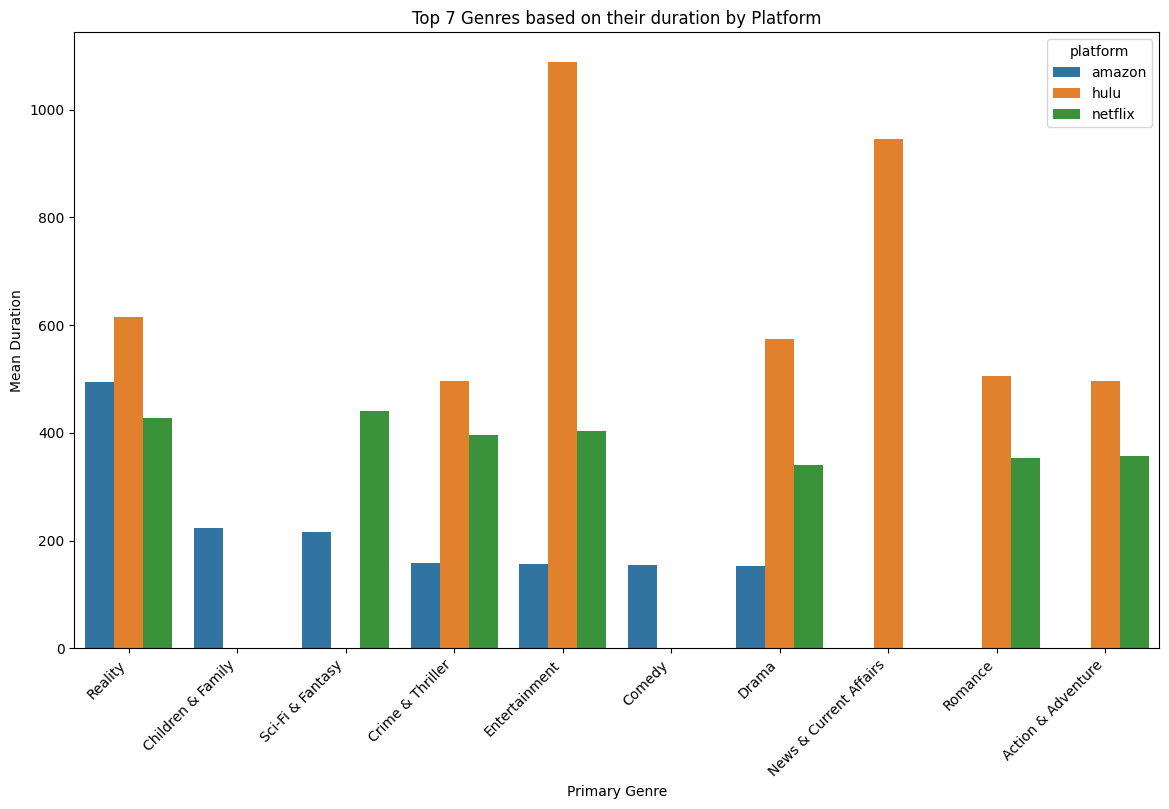

In [ ]:
platform_genre_popularity = stream.groupby(['platform', 'Primary Genre']).agg({
    'Duration': 'mean',
    'Number of Episodes': 'mean'
}).reset_index()

# Get the top 7 genres for each platform based on mean duration
top_genres_by_platform = platform_genre_popularity.groupby('platform').apply(lambda x: x.nlargest(7, 'Duration')).reset_index(drop=True)

# Plotting
plt.figure(figsize=(14, 8))
sns.barplot(x='Primary Genre', y='Duration', hue='platform', data=top_genres_by_platform)
plt.title('Top 7 Genres based on their duration by Platform')
plt.xlabel('Primary Genre')
plt.ylabel('Mean Duration')
plt.xticks(rotation=45, ha='right')
plt.show()


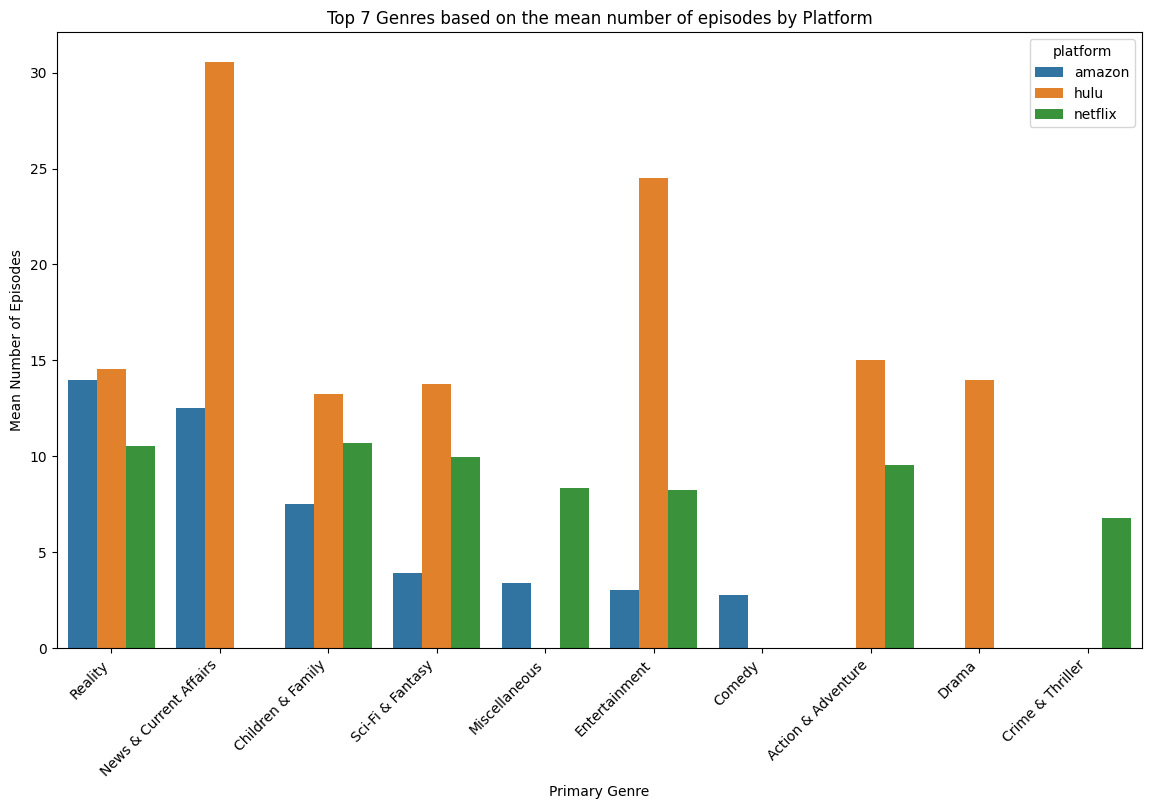

In [ ]:
# Group by platform and genre, calculate mean duration and number of episodes
platform_genre_popularity = stream.groupby(['platform', 'Primary Genre']).agg({
    'Duration': 'mean',
    'Number of Episodes': 'mean'
}).reset_index()

# Get the top 7 genres for each platform based on mean number of episodes
top_genres_by_platform_episodes = platform_genre_popularity.groupby('platform').apply(lambda x: x.nlargest(7, 'Number of Episodes')).reset_index(drop=True)

# Plotting
plt.figure(figsize=(14, 8))
sns.barplot(x='Primary Genre', y='Number of Episodes', hue='platform', data=top_genres_by_platform_episodes)
plt.title('Top 7 Genres based on the mean number of episodes by Platform')
plt.xlabel('Primary Genre')
plt.ylabel('Mean Number of Episodes')
plt.xticks(rotation=45, ha='right')
plt.show()


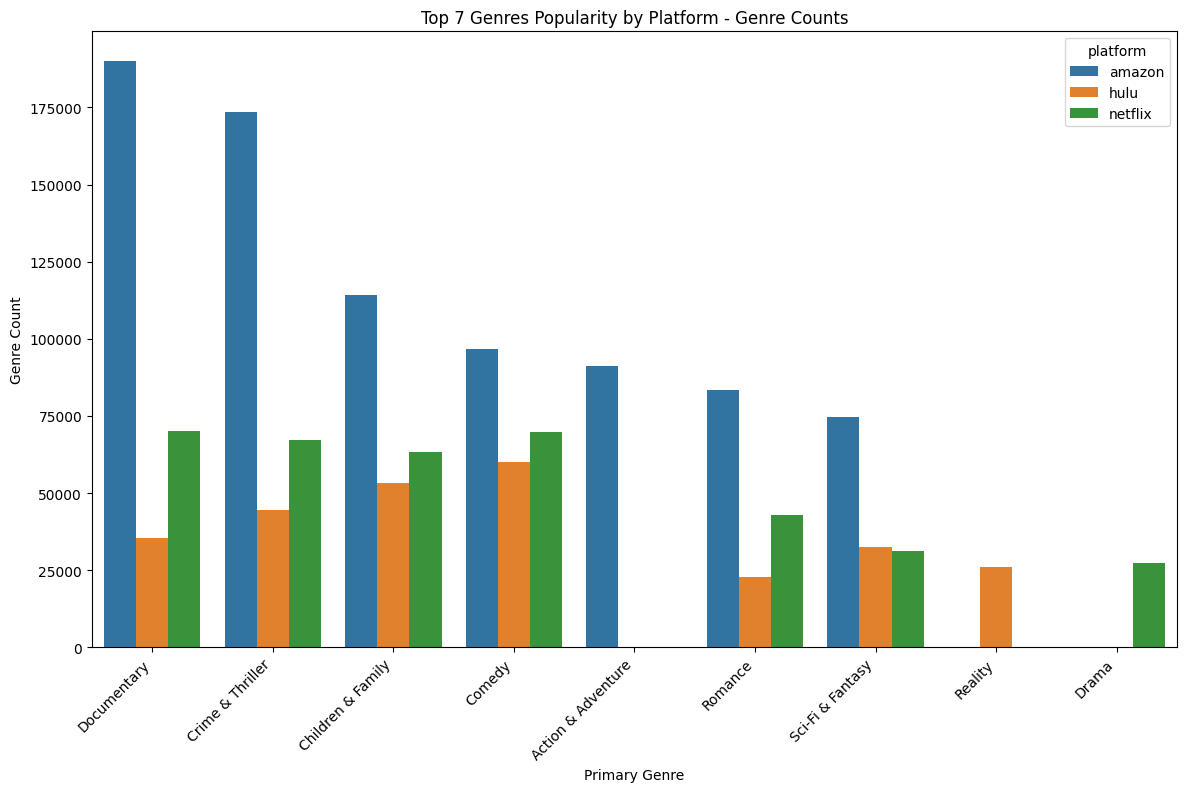

In [ ]:
platform_genre_counts = stream.groupby(['platform', 'Primary Genre']).size().reset_index(name='Genre Count')

# Get the top 7 genres for each platform based on count
top_genres_by_platform_counts = platform_genre_counts.groupby('platform').apply(lambda x: x.nlargest(7, 'Genre Count')).reset_index(drop=True)

# Plotting
plt.figure(figsize=(14, 8))
sns.barplot(x='Primary Genre', y='Genre Count', hue='platform', data=top_genres_by_platform_counts)
plt.title('Top 7 Genres Popularity by Platform - Genre Counts')
plt.xlabel('Primary Genre')
plt.ylabel('Genre Count')
plt.xticks(rotation=45, ha='right')
plt.show()


### Which production companies make what kinds of genres usually?

In [ ]:
production_company_genre = stream.groupby(['Primary Production Company', 'Primary Genre']).agg({
    'Duration': 'mean',
    'Number of Episodes': 'mean'
}).reset_index()

print("Production Company Genre Analysis:")
print(production_company_genre)


Production Company Genre Analysis:
            Primary Production Company       Primary Genre  Duration  \
0                    #Beardforce Films         Documentary      73.0   
1                       #Sinning Works    Crime & Thriller      93.0   
2            'Am I Wrong?' Productions    Crime & Thriller     105.0   
3                                  (C)             Romance     503.0   
4      1 Bullet in the Gun Productions    Crime & Thriller      87.0   
...                                ...                 ...       ...   
30927                     Студия Тритэ       Entertainment     134.0   
30928       “Mount NABI” Film Partners    Sci-Fi & Fantasy      72.0   
30929                   マイシアターd.D.株式会社  Action & Adventure     105.0   
30930                   マイシアターd.D.株式会社    Crime & Thriller     100.0   
30931                           ミッドシップ               Drama     108.0   

       Number of Episodes  
0                0.000000  
1                0.000000  
2               

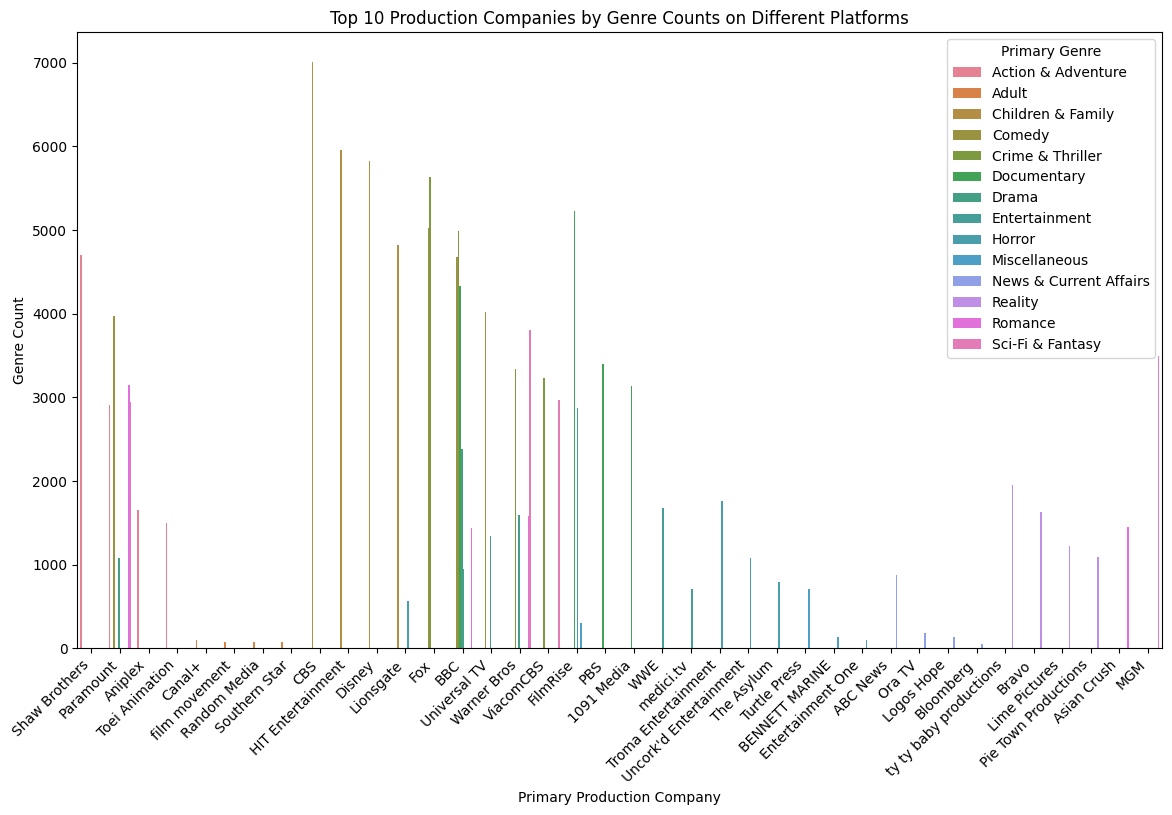

In [ ]:
# Group by production company and genre, calculate counts
company_genre_counts = stream.groupby(['Primary Production Company', 'Primary Genre']).size().reset_index(name='Genre Count')

# Get the top 10 production companies for each genre based on count
top_companies_by_genre_counts = company_genre_counts.groupby('Primary Genre').apply(lambda x: x.nlargest(5, 'Genre Count')).reset_index(drop=True)

# Filter out 'No Company Assigned'
top_companies_by_genre_counts = top_companies_by_genre_counts[
    top_companies_by_genre_counts['Primary Production Company'] != 'No Company Assigned']

# Plotting
plt.figure(figsize=(14, 8))
sns.barplot(x='Primary Production Company', y='Genre Count', hue='Primary Genre', data=top_companies_by_genre_counts)
plt.title('Top 10 Production Companies by Genre Counts on Different Platforms')
plt.xlabel('Primary Production Company')
plt.ylabel('Genre Count')
plt.xticks(rotation=45, ha='right')
plt.show()


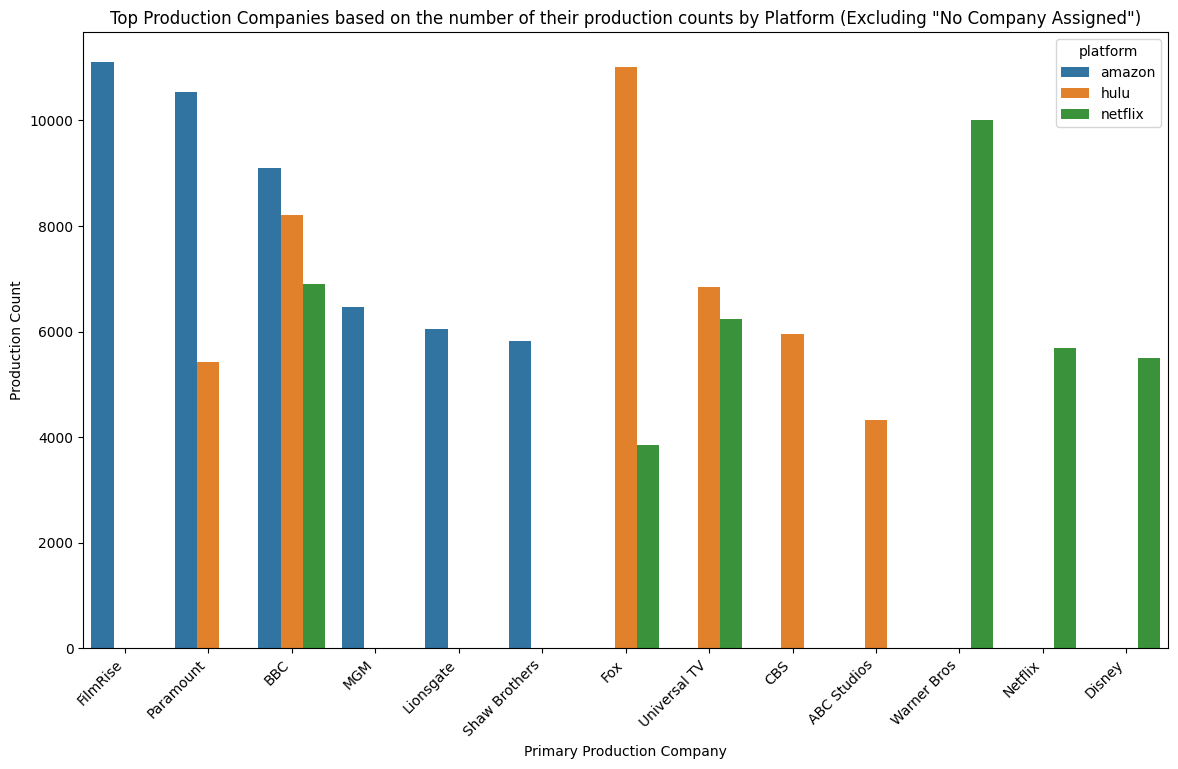

In [ ]:
# Filter out 'no company assigned'
top_companies_by_platform_counts = top_companies_by_platform_counts[top_companies_by_platform_counts['Primary Production Company'] != 'No Company Assigned']

# Plotting
plt.figure(figsize=(14, 8))
sns.barplot(x='Primary Production Company', y='Production Count', hue='platform', data=top_companies_by_platform_counts)
plt.title('Top Production Companies based on the number of their production counts by Platform (Excluding "No Company Assigned")')
plt.xlabel('Primary Production Company')
plt.ylabel('Production Count')
plt.xticks(rotation=45, ha='right')
plt.show()



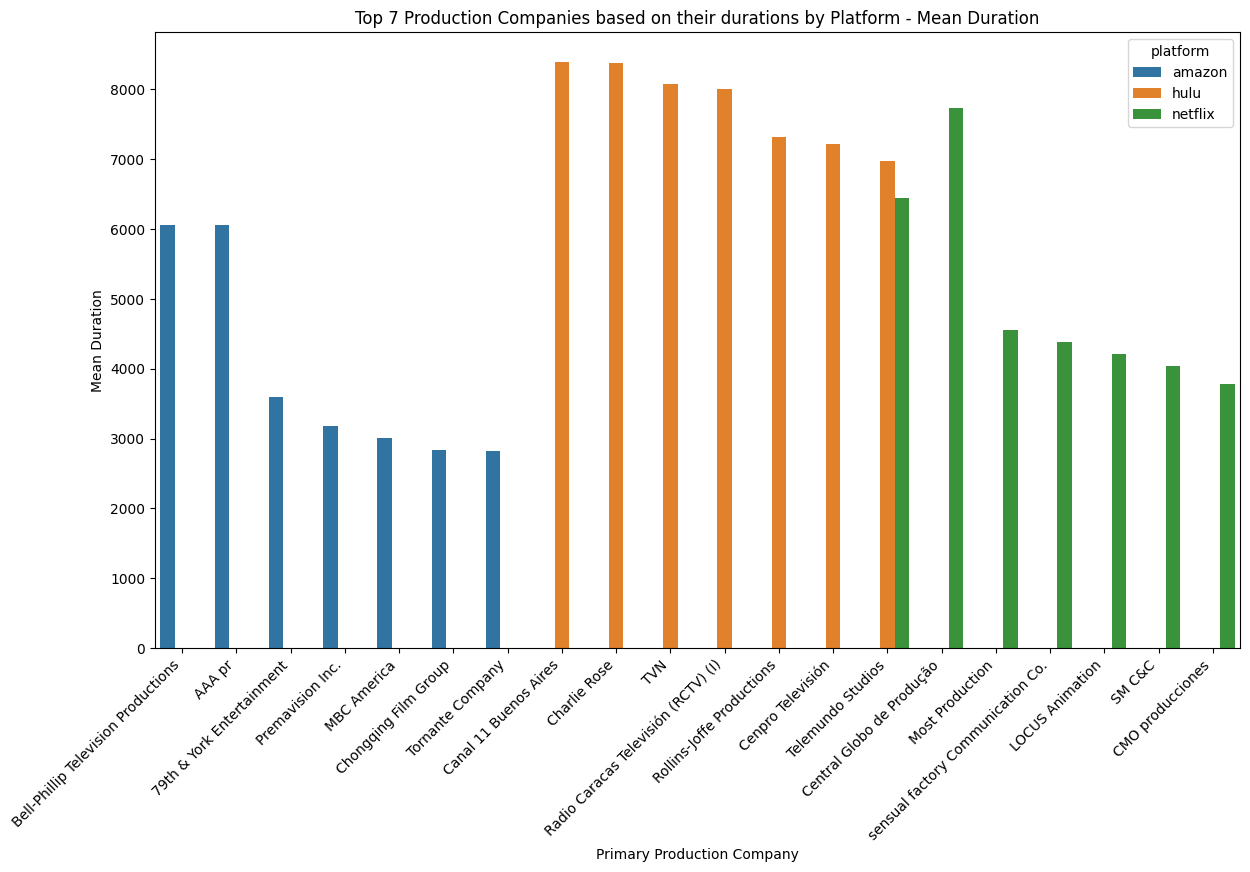

In [ ]:
# Group by platform and production company, calculate mean duration
platform_company_popularity = stream.groupby(['platform', 'Primary Production Company']).agg({
    'Duration': 'mean',
    'Number of Episodes': 'mean'
}).reset_index()

# Get the top 7 production companies for each platform based on mean duration
top_companies_by_platform = platform_company_popularity.groupby('platform').apply(lambda x: x.nlargest(7, 'Duration')).reset_index(drop=True)

# Plotting
plt.figure(figsize=(14, 8))
sns.barplot(x='Primary Production Company', y='Duration', hue='platform', data=top_companies_by_platform)
plt.title('Top 7 Production Companies based on their durations by Platform - Mean Duration')
plt.xlabel('Primary Production Company')
plt.ylabel('Mean Duration')
plt.xticks(rotation=45, ha='right')
plt.show()


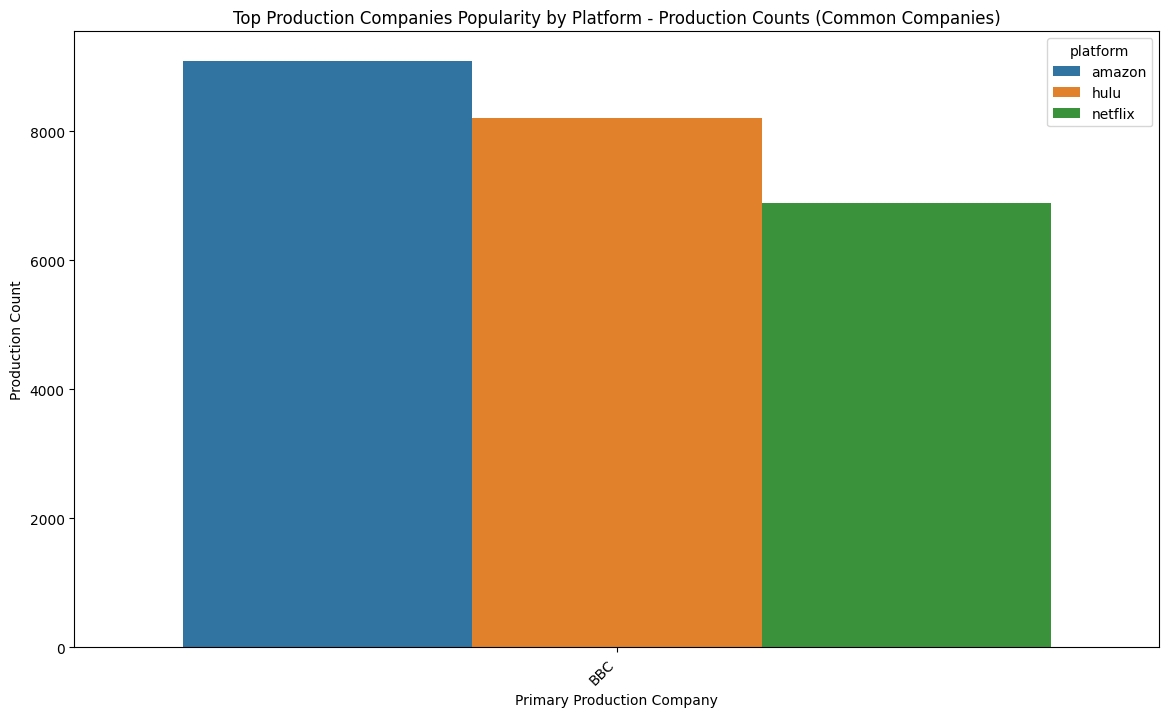

In [ ]:
top_companies_by_platform_counts = top_companies_by_platform_counts[
    top_companies_by_platform_counts['Primary Production Company'] != 'No Company Assigned']

# Get the list of common production companies for all platforms
common_companies = top_companies_by_platform_counts.groupby('Primary Production Company').filter(lambda x: len(x) == len(top_companies_by_platform_counts['platform'].unique()))

# Filter the original DataFrame to include only common production companies
top_common_companies_by_platform_counts = top_companies_by_platform_counts[
    top_companies_by_platform_counts['Primary Production Company'].isin(common_companies['Primary Production Company'].unique())]

# Plotting
plt.figure(figsize=(14, 8))
sns.barplot(x='Primary Production Company', y='Production Count', hue='platform', data=top_common_companies_by_platform_counts)
plt.title('Top Production Companies Popularity by Platform - Production Counts (Common Companies)')
plt.xlabel('Primary Production Company')
plt.ylabel('Production Count')
plt.xticks(rotation=45, ha='right')
plt.show()


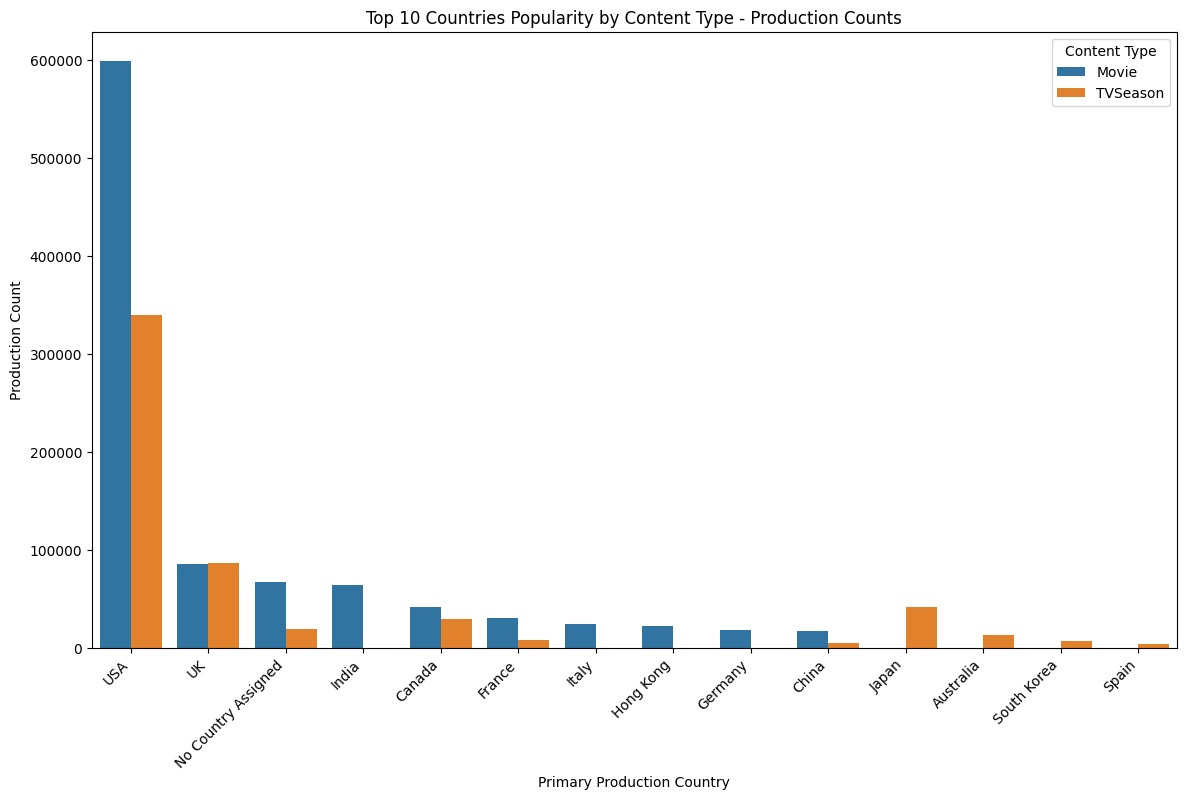

In [ ]:
# Group by country and content type, calculate counts
country_content_counts = stream.groupby(['Primary Production Country', 'Content Type']).size().reset_index(name='Production Count')

# Get the top 7 countries for each content type based on count
top_countries_by_content_counts = country_content_counts.groupby('Content Type').apply(lambda x: x.nlargest(10, 'Production Count')).reset_index(drop=True)

# Plotting
plt.figure(figsize=(14, 8))
sns.barplot(x='Primary Production Country', y='Production Count', hue='Content Type', data=top_countries_by_content_counts)
plt.title('Top 10 Countries Popularity by Content Type - Production Counts')
plt.xlabel('Primary Production Country')
plt.ylabel('Production Count')
plt.xticks(rotation=45, ha='right')
plt.show()


In [ ]:
production_company_genre = stream.groupby(['Primary Production Company', 'Primary Genre']).agg({
    'Duration': 'mean',
    'Number of Episodes': 'mean'
}).reset_index()

print("Production Company Genre Analysis:")
print(production_company_genre)


Production Company Genre Analysis:
            Primary Production Company       Primary Genre  Duration  \
0                    #Beardforce Films         Documentary      73.0   
1                       #Sinning Works    Crime & Thriller      93.0   
2            'Am I Wrong?' Productions    Crime & Thriller     105.0   
3                                  (C)             Romance     503.0   
4      1 Bullet in the Gun Productions    Crime & Thriller      87.0   
...                                ...                 ...       ...   
30927                     Студия Тритэ       Entertainment     134.0   
30928       “Mount NABI” Film Partners    Sci-Fi & Fantasy      72.0   
30929                   マイシアターd.D.株式会社  Action & Adventure     105.0   
30930                   マイシアターd.D.株式会社    Crime & Thriller     100.0   
30931                           ミッドシップ               Drama     108.0   

       Number of Episodes  
0                0.000000  
1                0.000000  
2               

### Bivariate Analysis - Platform and Genre Popularity:

In [ ]:
platform_genre_counts = stream.groupby(['platform', 'Primary Genre']).size().reset_index(name='Count')

# Pivot the table using counts
platform_genre_pivot_counts = pd.pivot_table(platform_genre_counts, values='Count', index='platform', columns='Primary Genre', fill_value=0)

print("Platform vs. Genre Popularity Pivot Table (Counts):")
platform_genre_pivot_counts

Platform vs. Genre Popularity Pivot Table (Counts):


Primary Genre,Action & Adventure,Adult,Children & Family,Comedy,Crime & Thriller,Documentary,Drama,Entertainment,Horror,Miscellaneous,News & Current Affairs,Reality,Romance,Sci-Fi & Fantasy
platform,,,,,,,,,,,,,,
amazon,91322,1770,114153,96855,173482,190105,58924,28546,41728,3548,165,10643,83319,74600
hulu,20032,308,53363,60197,44440,35528,12670,13697,7259,956,1694,25959,22955,32406
netflix,18517,561,63186,69930,67317,70121,27419,4768,8200,208,0,6319,43007,31130


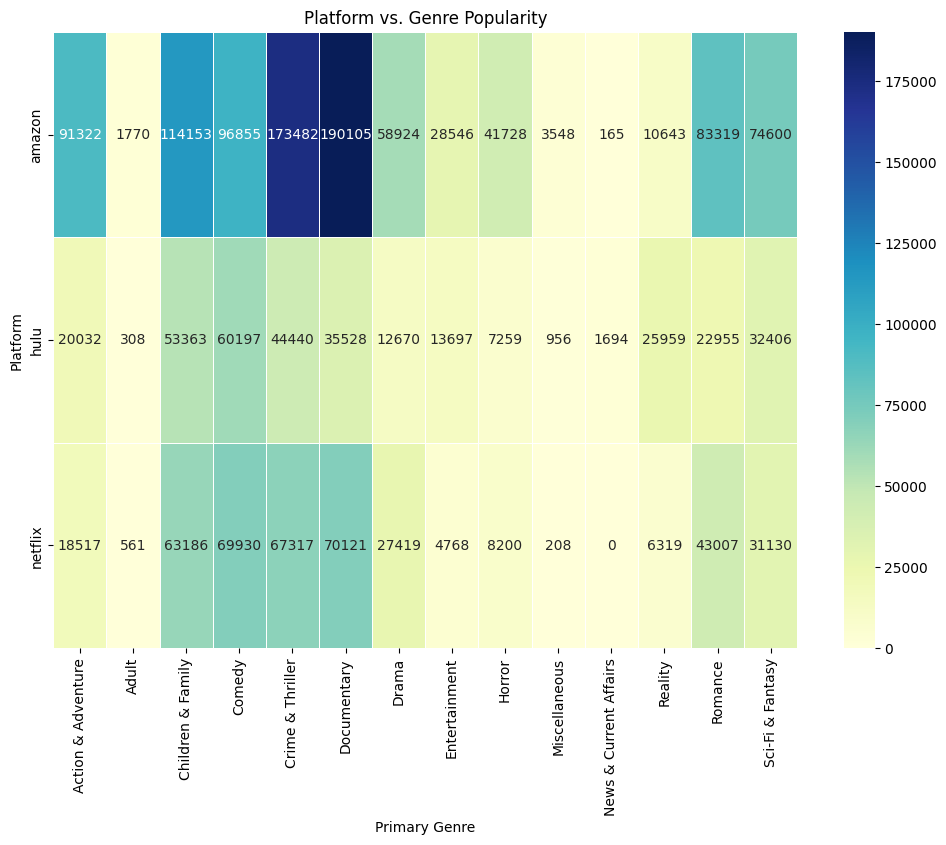

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(platform_genre_pivot_counts, cmap="YlGnBu", annot=True, fmt='g', linewidths=.5)
plt.title('Platform vs. Genre Popularity')
plt.xlabel('Primary Genre')
plt.ylabel('Platform')
plt.show()

<ipython-input-129-0dda305d4aea>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Primary Genre', data=total_genre_counts, palette='viridis', orient='h')


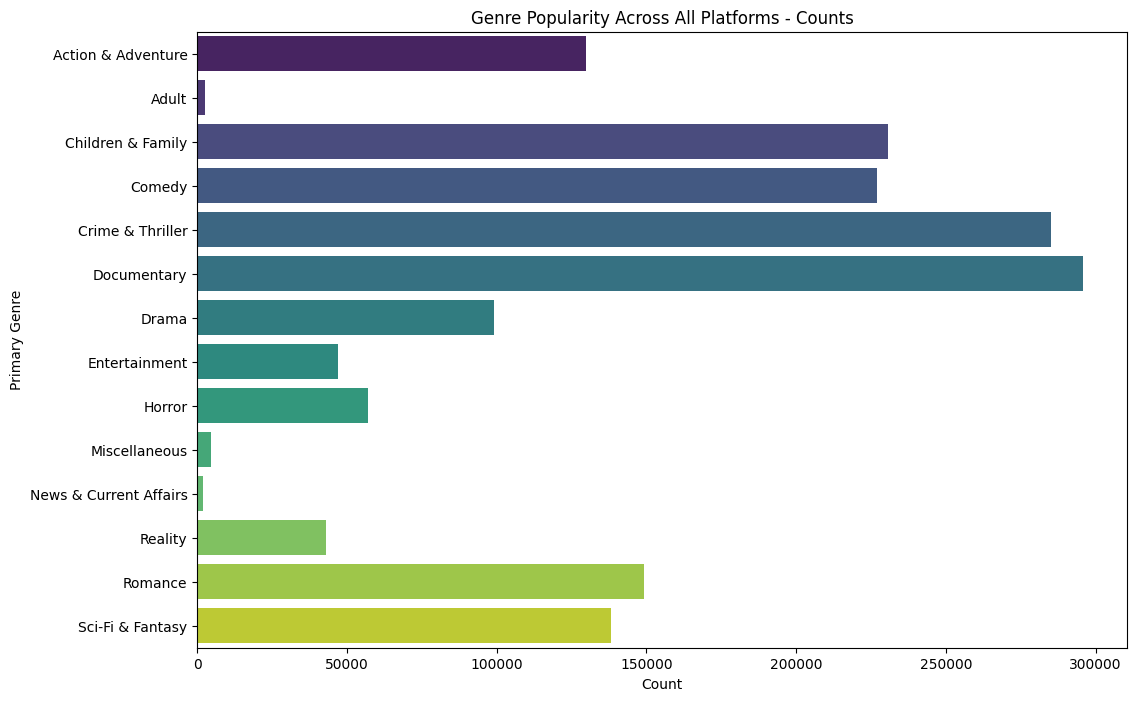

In [ ]:
total_genre_counts = platform_genre_counts.groupby('Primary Genre')['Count'].sum().reset_index()

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Primary Genre', data=total_genre_counts, palette='viridis', orient='h')
plt.title('Genre Popularity Across All Platforms - Counts')
plt.xlabel('Count')
plt.ylabel('Primary Genre')
plt.show()

### Multivariate Analysis - Count by Platform, Genre, and Content Type:

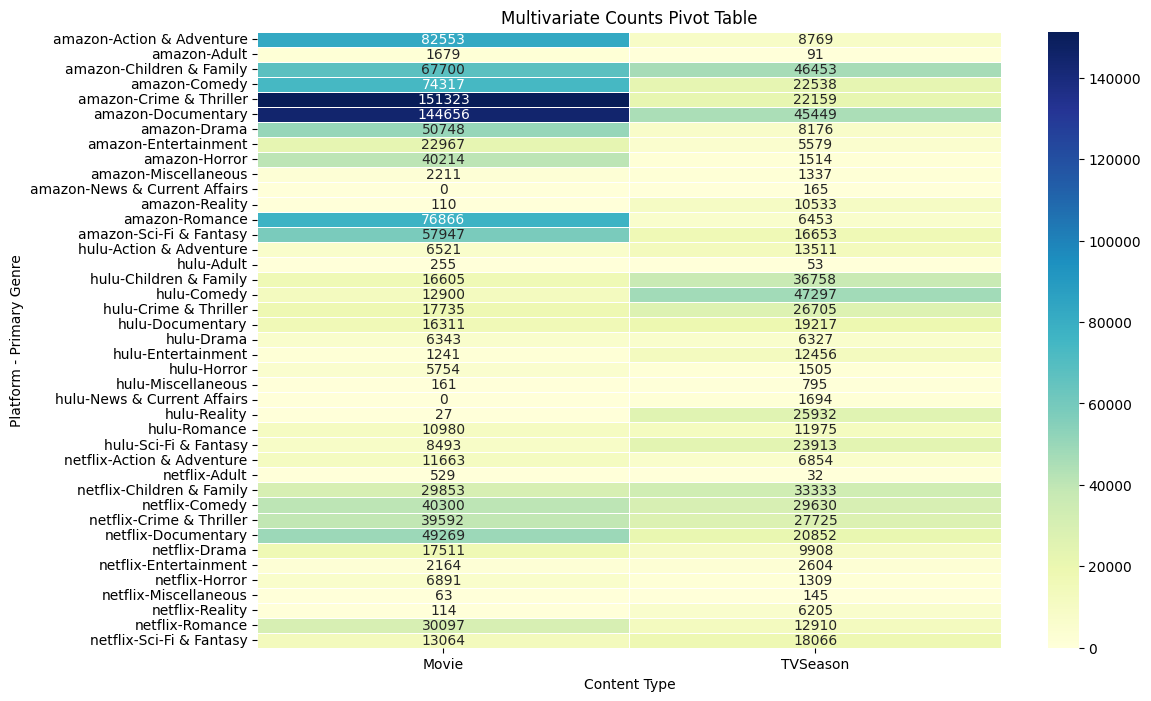

In [ ]:
multivariate_counts = stream.groupby(['platform', 'Primary Genre', 'Content Type']).size().reset_index(name='Count')

# Pivot the table using counts
multivariate_pivot_counts = pd.pivot_table(multivariate_counts, values='Count', index=['platform', 'Primary Genre'], columns='Content Type', fill_value=0)

# Plotting
plt.figure(figsize=(12, 8))
sns.heatmap(multivariate_pivot_counts, cmap="YlGnBu", annot=True, fmt='g', linewidths=.5)
plt.title('Multivariate Counts Pivot Table')
plt.xlabel('Content Type')
plt.ylabel('Platform - Primary Genre')
plt.show()

### Multivariate Analysis - Count by Platform, Country, and Content Type:

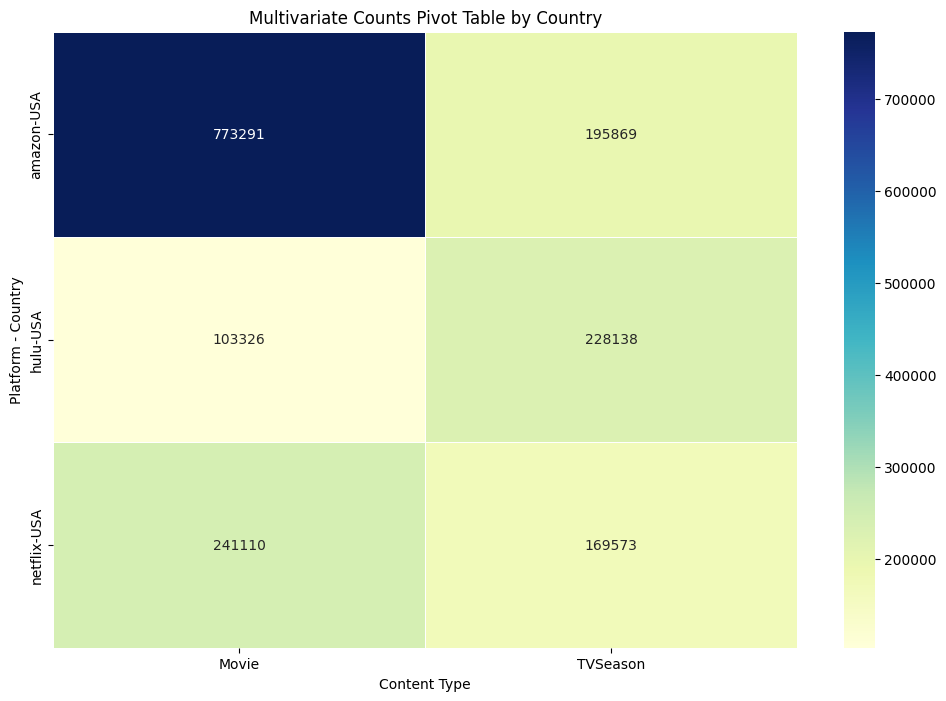

In [ ]:
multivariate_counts_country = stream.groupby(['platform', 'Country', 'Content Type']).size().reset_index(name='Count')

# Get all unique countries
all_countries = multivariate_counts_country['Country'].unique()

# Pivot the table using counts, including all countries
multivariate_pivot_counts_country = pd.pivot_table(
    multivariate_counts_country[multivariate_counts_country['Country'].isin(all_countries)],
    values='Count', index=['platform', 'Country'], columns='Content Type', fill_value=0
)

# Plotting
plt.figure(figsize=(12, 8))
sns.heatmap(multivariate_pivot_counts_country, cmap="YlGnBu", annot=True, fmt='g', linewidths=.5)
plt.title('Multivariate Counts Pivot Table by Country')
plt.xlabel('Content Type')
plt.ylabel('Platform - Country')
plt.show()

### Which countries produce what kinds of genres?

In [ ]:
country_genre_counts = stream.groupby(['Primary Production Country', 'Primary Genre']).size().reset_index(name='Count')

print("Country Genre Analysis (Counts):")
country_genre_counts


Country Genre Analysis (Counts):


,Primary Production Country,Primary Genre,Count
0,Algeria,Action & Adventure,18
1,Algeria,Crime & Thriller,25
2,Angola,Action & Adventure,5
3,Argentina,Action & Adventure,107
4,Argentina,Children & Family,592
...,...,...,...
676,Ukraine,Crime & Thriller,175
677,Ukraine,Documentary,125
678,Ukraine,Drama,52
679,Ukraine,Entertainment,38


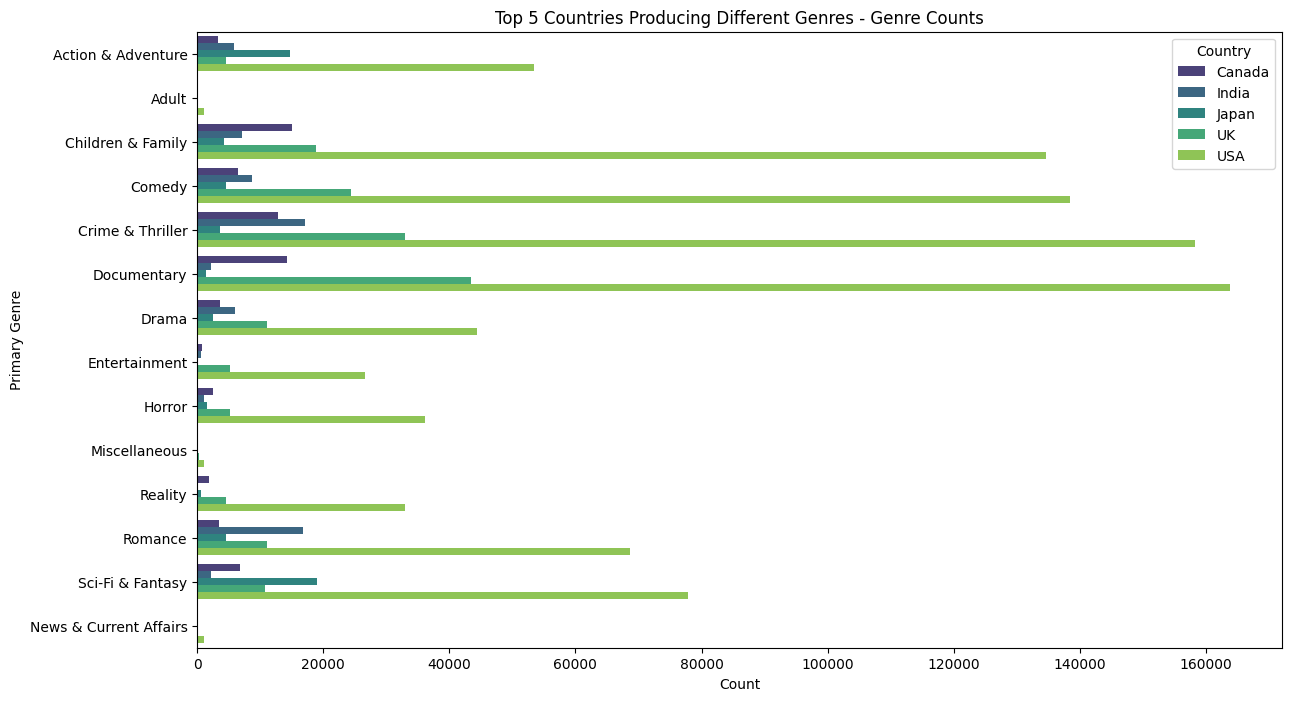

In [ ]:
country_genre_counts_filtered = country_genre_counts[country_genre_counts['Primary Production Country'] != 'No Country Assigned']

# Get the top 5 countries based on counts
top_countries = country_genre_counts_filtered.groupby('Primary Production Country')['Count'].sum().nlargest(5).index

# Filter the DataFrame for the top 5 countries
country_genre_counts_top5 = country_genre_counts_filtered[country_genre_counts_filtered['Primary Production Country'].isin(top_countries)]

# Plotting
plt.figure(figsize=(14, 8))
sns.barplot(x='Count', y='Primary Genre', hue='Primary Production Country', data=country_genre_counts_top5, palette='viridis')
plt.title('Top 5 Countries Producing Different Genres - Genre Counts')
plt.xlabel('Count')
plt.ylabel('Primary Genre')
plt.legend(title='Country', bbox_to_anchor=(1, 1))
plt.show()

<ipython-input-143-f515445bdc96>:15: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  sns.heatmap(tv_viewership_by_date.pivot('Month', 'Day', 'Units'), cmap="YlGnBu", annot=True, fmt='g', linewidths=.5)


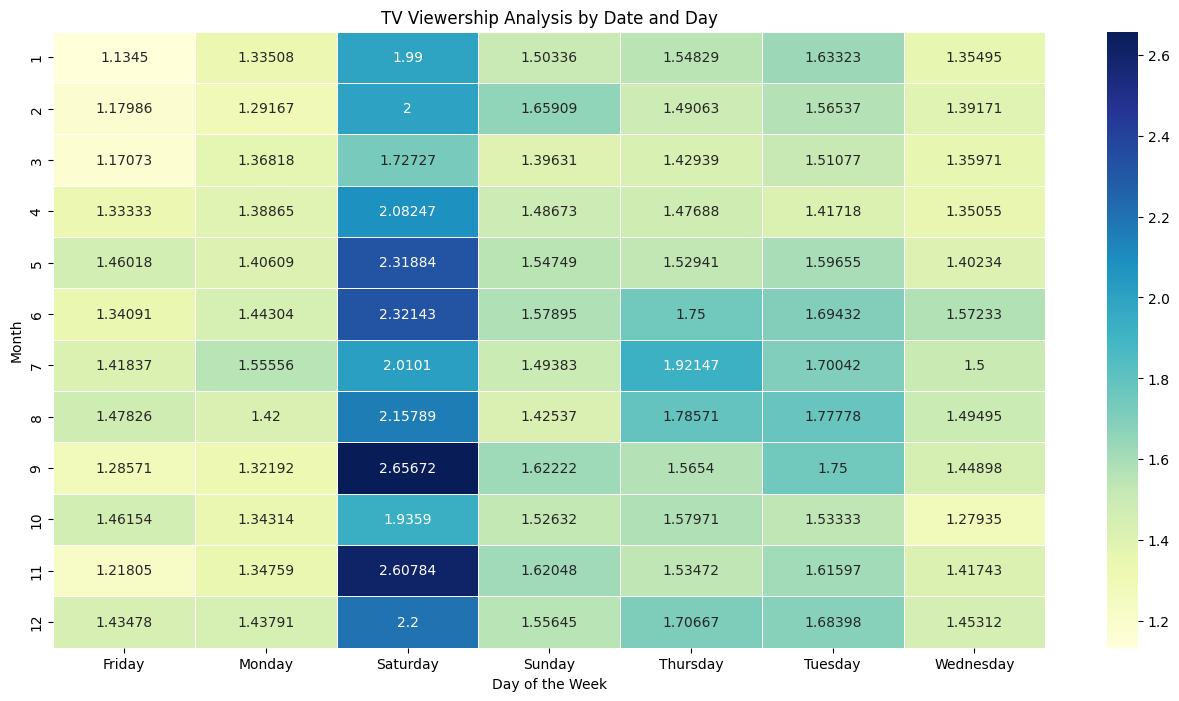

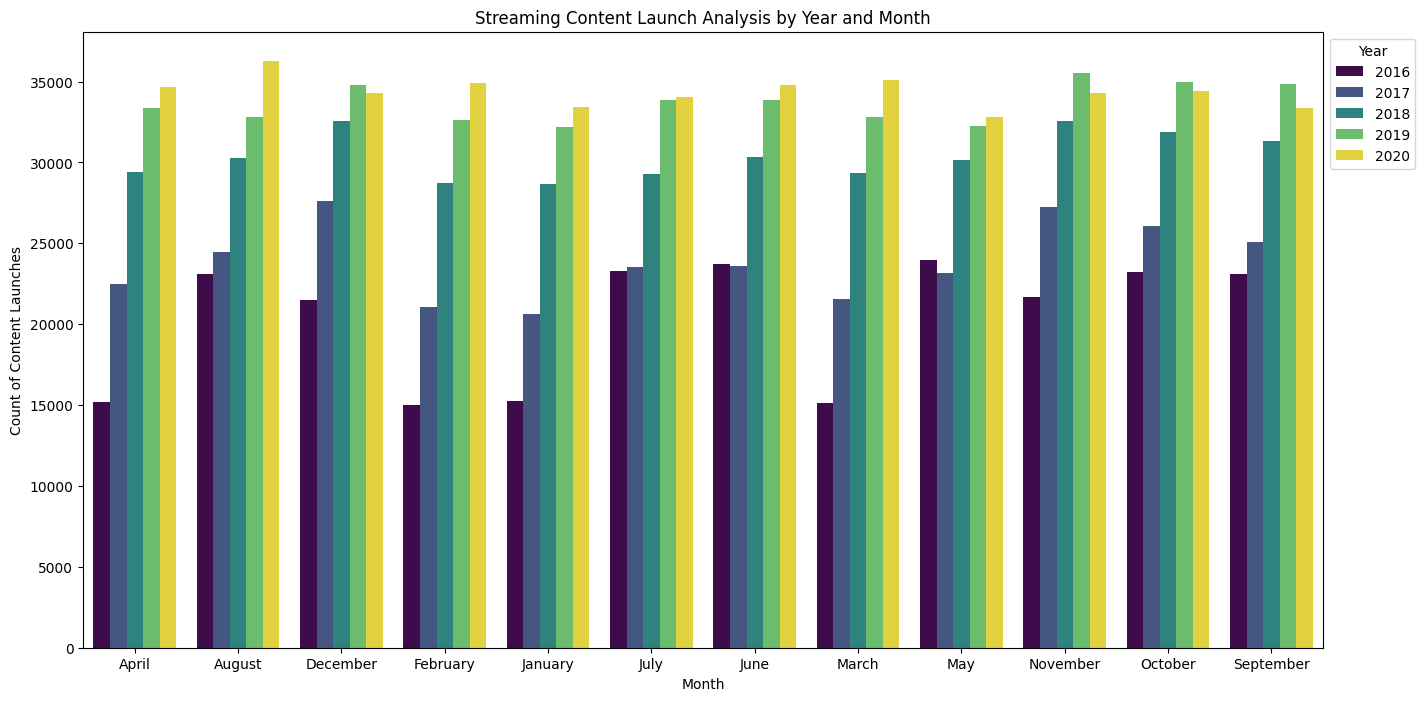

In [ ]:
tv_data = nielsen_reach.copy()

# Convert 'Date' to datetime type
tv_data['Date'] = pd.to_datetime(tv_data['Date'])

# Extract month and day for analysis
tv_data['Month'] = tv_data['Date'].dt.month
tv_data['Day'] = tv_data['Date'].dt.day_name()

# Group by month and day to get average viewership
tv_viewership_by_date = tv_data.groupby(['Month', 'Day']).agg({'Units': 'mean'}).reset_index()

# Plotting
plt.figure(figsize=(16, 8))
sns.heatmap(tv_viewership_by_date.pivot('Month', 'Day', 'Units'), cmap="YlGnBu", annot=True, fmt='g', linewidths=.5)
plt.title('TV Viewership Analysis by Date and Day')
plt.xlabel('Day of the Week')
plt.ylabel('Month')
plt.show()

# Streaming Data: Content Launch Analysis based on YearMonth
# Assuming stream is the streaming data DataFrame
stream_data = stream.copy()

# Convert 'YearMonth' to datetime type
stream_data['YearMonth'] = pd.to_datetime(stream_data['YearMonth'], format='%b-%Y')

# Extract year and month for analysis
stream_data['Year'] = stream_data['YearMonth'].dt.year
stream_data['Month'] = stream_data['YearMonth'].dt.month_name()

# Group by year and month to get count of content launches
stream_content_launches = stream_data.groupby(['Year', 'Month']).size().reset_index(name='Count')

# Plotting
plt.figure(figsize=(16, 8))
sns.barplot(x='Month', y='Count', hue='Year', data=stream_content_launches, palette='viridis')
plt.title('Streaming Content Launch Analysis by Year and Month')
plt.xlabel('Month')
plt.ylabel('Count of Content Launches')
plt.legend(title='Year', bbox_to_anchor=(1, 1))
plt.show()

Top 10 Programs on TV based on Viewership:
Program Name
 BIG BANG THEORY, THE     30824258836
 NCIS                     11678038533
 BLUE BLOODS               9092902558
 NCIS: NEW ORLEANS         8600424454
 HAWAII FIVE-0             8086656892
 BULL                      7721133045
 NCIS: LOS ANGELES         7293537622
 GREY'S ANATOMY            6878448838
 CHICAGO PD                6292242739
 CHICAGO FIRE              6198336251
Name: AA Reach Proj(units), dtype: int64


<ipython-input-147-ea2176da1e98>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_tv_programs_by_viewership.values, y=top_tv_programs_by_viewership.index, palette='Blues')


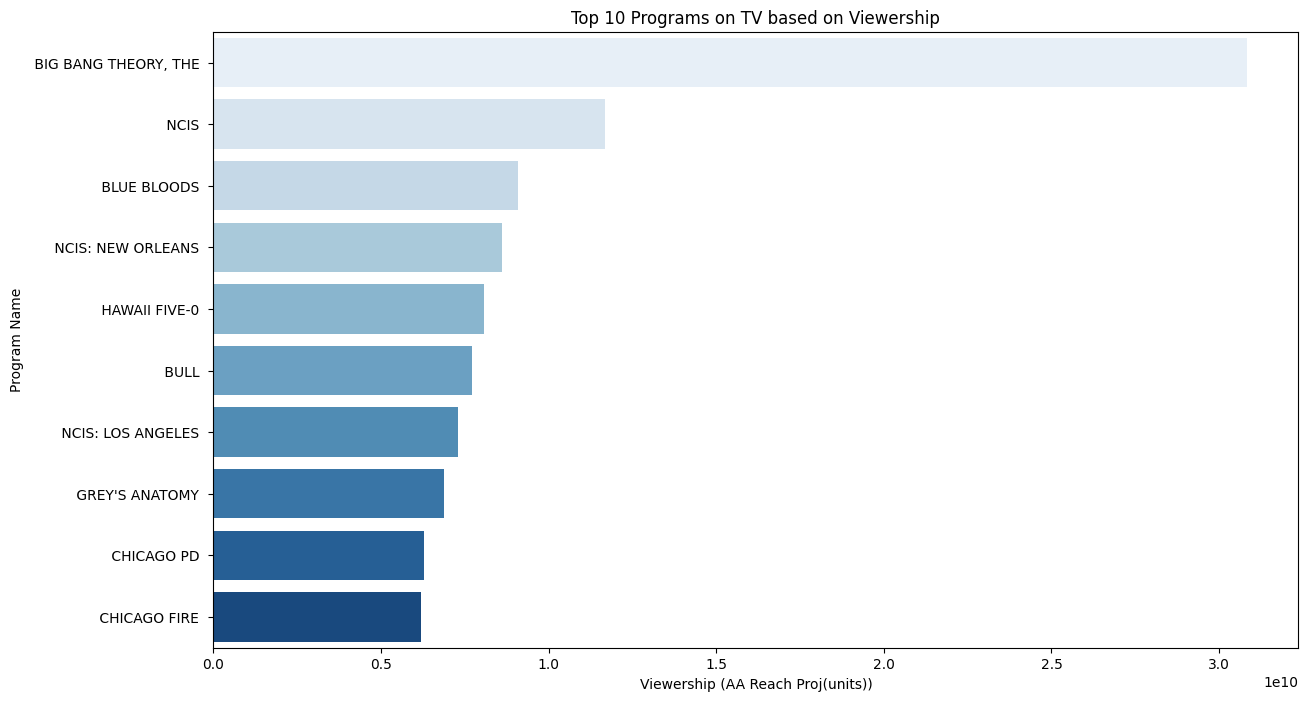


Top 5 Genres on Streaming:
Documentary          295754
Crime & Thriller     285239
Children & Family    230702
Comedy               226982
Romance              149281
Name: Primary Genre, dtype: int64


<ipython-input-147-ea2176da1e98>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_streaming_genres.values, y=top_streaming_genres.index, palette='Oranges')


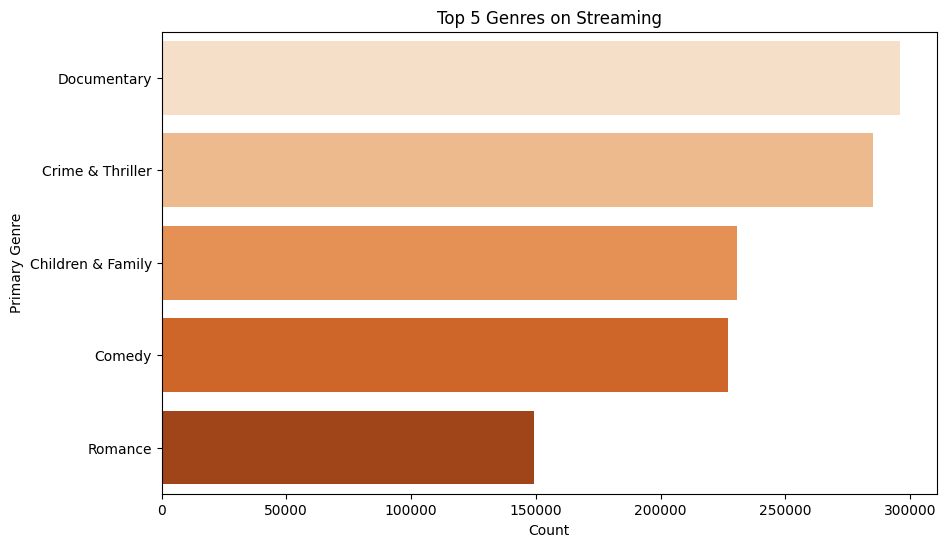

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# TV Data: Top 10 Programs Analysis based on Viewership
# Assuming nielsen_reach is the TV data DataFrame
top_tv_programs_by_viewership = nielsen_reach.groupby('Program Name')['AA Reach Proj(units)'].sum().sort_values(ascending=False).head(10)

# Display top 10 programs and their viewership statistics
print("Top 10 Programs on TV based on Viewership:")
print(top_tv_programs_by_viewership)

# Plotting Top 10 Programs on TV based on Viewership
plt.figure(figsize=(14, 8))
sns.barplot(x=top_tv_programs_by_viewership.values, y=top_tv_programs_by_viewership.index, palette='Blues')
plt.title('Top 10 Programs on TV based on Viewership')
plt.xlabel('Viewership (AA Reach Proj(units))')
plt.ylabel('Program Name')
plt.show()

# Streaming Data: Top 5 Genres Analysis
# Assuming stream is the streaming data DataFrame
top_streaming_genres = stream['Primary Genre'].value_counts().head(5)

# Display top 5 genres on streaming and their counts
print("\nTop 5 Genres on Streaming:")
print(top_streaming_genres)

# Plotting Top 5 Genres on Streaming
plt.figure(figsize=(10, 6))
sns.barplot(x=top_streaming_genres.values, y=top_streaming_genres.index, palette='Oranges')
plt.title('Top 5 Genres on Streaming')
plt.xlabel('Count')
plt.ylabel('Primary Genre')
plt.show()


<ipython-input-152-fc12d72abc44>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_duration_analysis['Total Duration'] = pd.to_numeric(nielsen_share['Total Duration'].replace('[^0-9]', '', regex=True), errors='coerce')


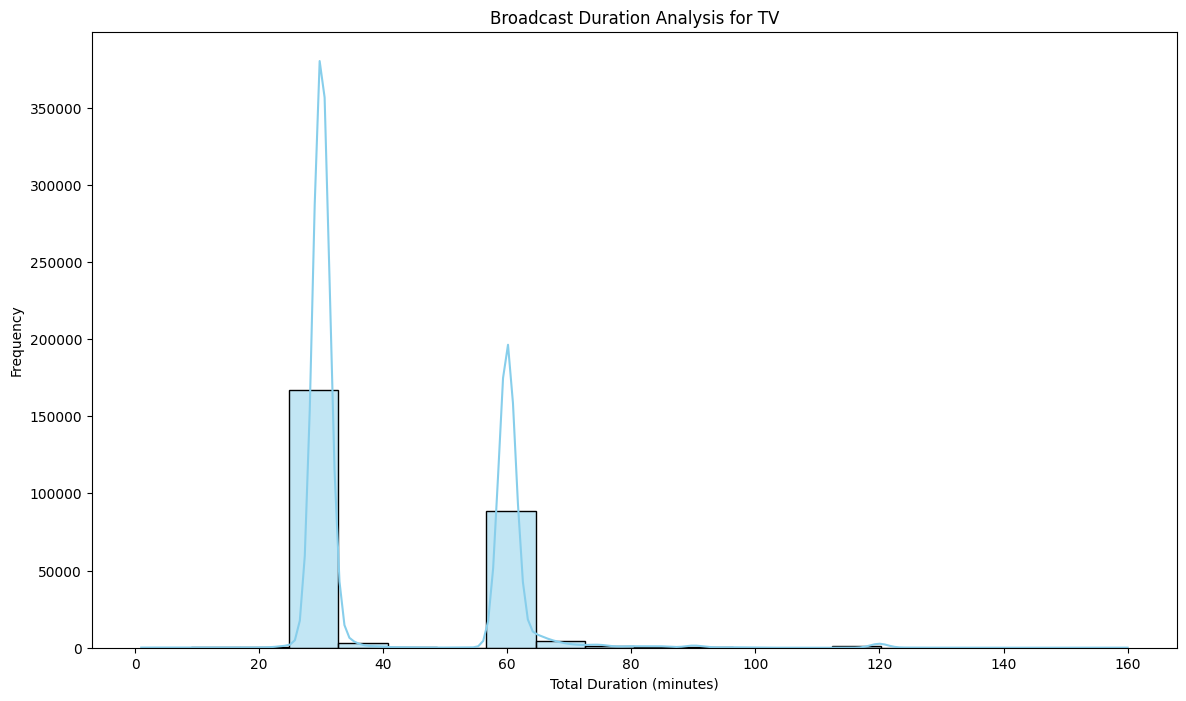

In [ ]:
# TV Data: Broadcast Duration Analysis
# Assuming nielsen_share is the TV data DataFrame
tv_duration_analysis = nielsen_share[['Total Duration']]

# Remove non-numeric characters from 'Total Duration' and convert to numeric
tv_duration_analysis['Total Duration'] = pd.to_numeric(nielsen_share['Total Duration'].replace('[^0-9]', '', regex=True), errors='coerce')

# Plotting Broadcast Duration Analysis for TV
plt.figure(figsize=(14, 8))
sns.histplot(tv_duration_analysis['Total Duration'].dropna(), bins=20, kde=True, color='skyblue')
plt.title('Broadcast Duration Analysis for TV')
plt.xlabel('Total Duration (minutes)')
plt.ylabel('Frequency')
plt.show()


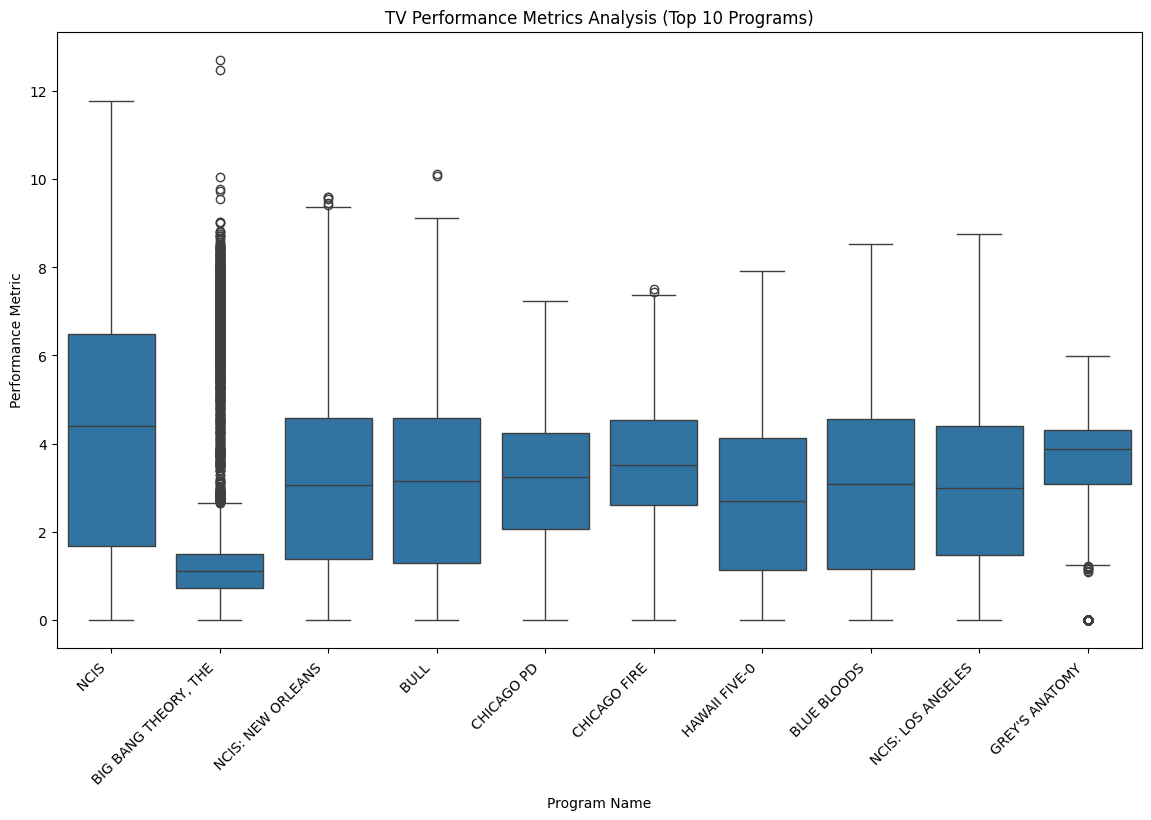

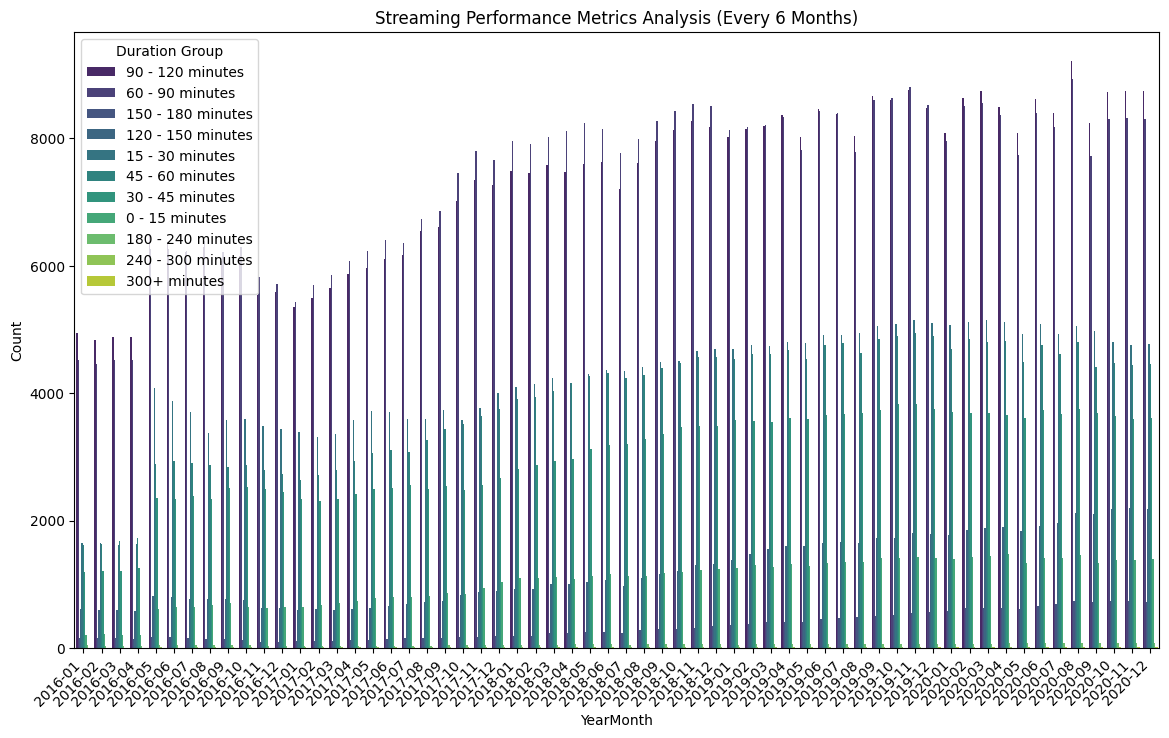

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# TV Data: Performance Metrics Analysis
# Assuming nielsen_reach and nielsen_share are the TV data DataFrames
top_tv_programs_by_viewership = nielsen_reach.groupby('Program Name')['AA Reach Proj(units)'].sum().sort_values(ascending=False).head(10)
tv_performance_metrics = pd.concat([nielsen_reach[['AA Reach%', 'Program Name']],
                                    nielsen_share[['MC US AA %', 'MC US Share AA %', 'Program Name']]])

# Filter TV performance metrics for the top 10 programs
tv_performance_metrics = tv_performance_metrics[tv_performance_metrics['Program Name'].isin(top_tv_programs_by_viewership.index)]

# Combine AA Reach% and MC US AA % metrics for visualization
tv_performance_metrics['Performance Metric'] = tv_performance_metrics['AA Reach%'].combine_first(tv_performance_metrics['MC US AA %'])

# Drop rows with missing performance metric information
tv_performance_metrics = tv_performance_metrics.dropna(subset=['Performance Metric'])

# Plotting TV Performance Metrics
plt.figure(figsize=(14, 8))
sns.boxplot(y='Performance Metric', x='Program Name', data=tv_performance_metrics)
plt.title('TV Performance Metrics Analysis (Top 10 Programs)')
plt.xlabel('Program Name')
plt.ylabel('Performance Metric')
plt.xticks(rotation=45, ha='right')
plt.show()

# Streaming Data: Performance Metrics Analysis
# Assuming stream is the streaming data DataFrame
stream_performance_metrics = stream[['YearMonth', 'Duration Group']]

# Exclude "No Group" and group by every 6 months
stream_performance_metrics = stream_performance_metrics[stream_performance_metrics['Duration Group'] != 'No Group']
stream_performance_metrics['YearMonth'] = pd.to_datetime(stream_performance_metrics['YearMonth'])
stream_performance_metrics['YearMonth'] = stream_performance_metrics['YearMonth'].dt.to_period("6M")

# Plotting Streaming Performance Metrics
plt.figure(figsize=(14, 8))
sns.countplot(x='YearMonth', hue='Duration Group', data=stream_performance_metrics, palette='viridis')
plt.title('Streaming Performance Metrics Analysis (Every 6 Months)')
plt.xlabel('YearMonth')
plt.ylabel('Count')
plt.legend(title='Duration Group')
plt.xticks(rotation=45, ha='right')
plt.show()


<ipython-input-155-30f254694275>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stream_performance_metrics['YearMonth'] = pd.to_datetime(stream_performance_metrics['YearMonth'])


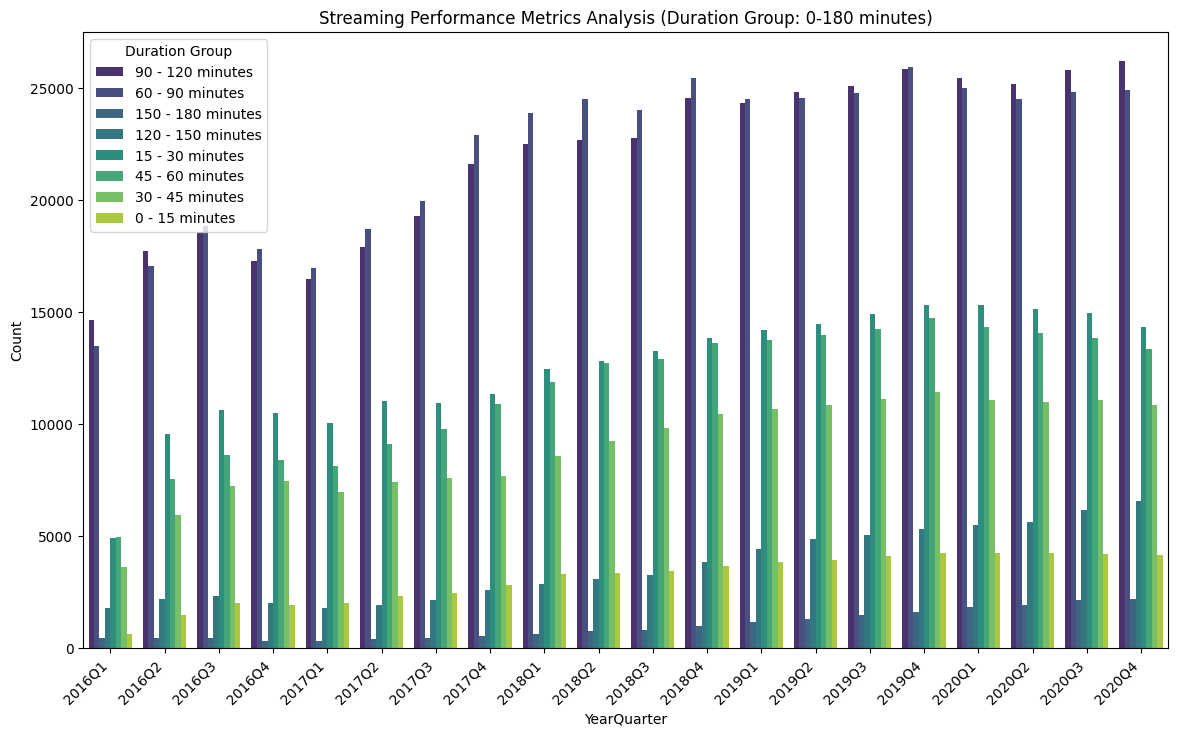

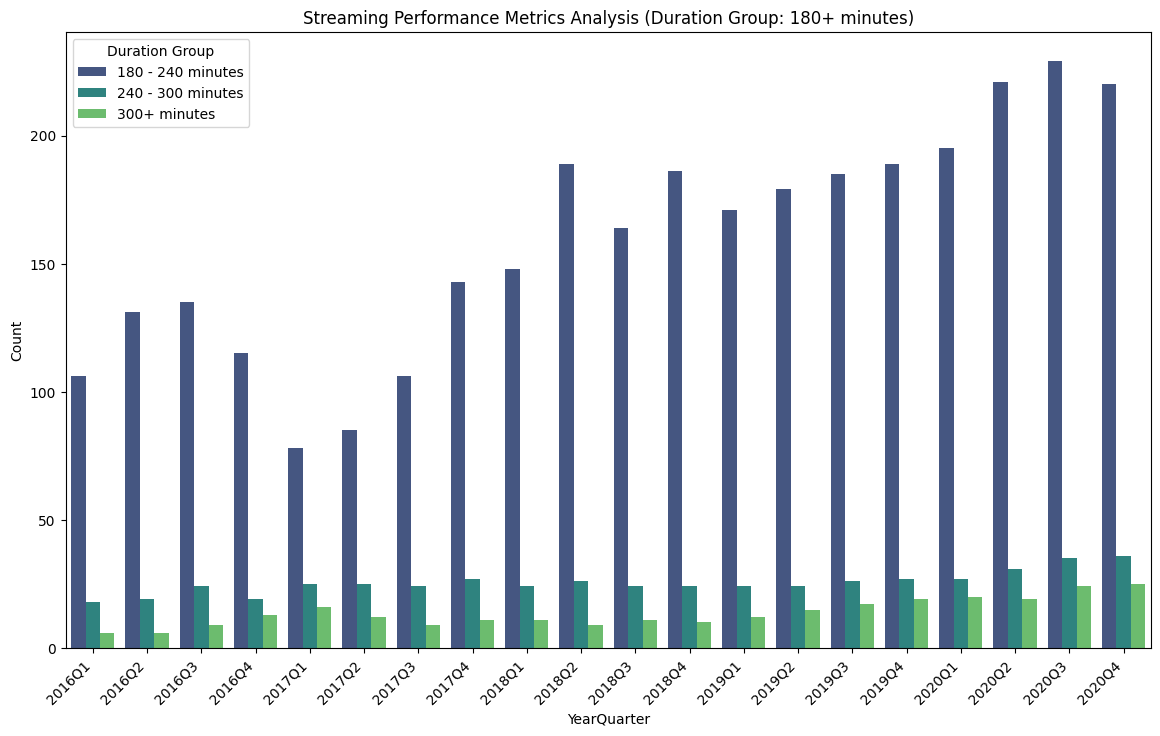

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Streaming Data: Performance Metrics Analysis
# Assuming stream is the streaming data DataFrame
stream_performance_metrics = stream[['YearMonth', 'Duration Group']]

# Exclude "No Group" and filter by two duration groups
stream_performance_metrics = stream_performance_metrics[stream_performance_metrics['Duration Group'] != 'No Group']
stream_performance_metrics['YearMonth'] = pd.to_datetime(stream_performance_metrics['YearMonth'])
stream_performance_metrics['YearQuarter'] = stream_performance_metrics['YearMonth'].dt.to_period("Q")

# Filter data for two duration groups
duration_group_1 = ['0 - 15 minutes', '15 - 30 minutes', '30 - 45 minutes', '45 - 60 minutes', '60 - 90 minutes', '90 - 120 minutes', '120 - 150 minutes', '150 - 180 minutes']
duration_group_2 = ['180 - 240 minutes', '240 - 300 minutes', '300+ minutes']

# Plotting Streaming Performance Metrics for Duration Group 0-180 minutes
plt.figure(figsize=(14, 8))
sns.countplot(x='YearQuarter', hue='Duration Group', data=stream_performance_metrics[stream_performance_metrics['Duration Group'].isin(duration_group_1)], palette='viridis')
plt.title('Streaming Performance Metrics Analysis (Duration Group: 0-180 minutes)')
plt.xlabel('YearQuarter')
plt.ylabel('Count')
plt.legend(title='Duration Group')
plt.xticks(rotation=45, ha='right')
plt.show()

# Plotting Streaming Performance Metrics for Duration Group 180+ minutes
plt.figure(figsize=(14, 8))
sns.countplot(x='YearQuarter', hue='Duration Group', data=stream_performance_metrics[stream_performance_metrics['Duration Group'].isin(duration_group_2)], palette='viridis')
plt.title('Streaming Performance Metrics Analysis (Duration Group: 180+ minutes)')
plt.xlabel('YearQuarter')
plt.ylabel('Count')
plt.legend(title='Duration Group')
plt.xticks(rotation=45, ha='right')
plt.show()


## Key Takeaways

1. Dramas, comedies, and exclusive original content are highly attractive on streaming platforms, with high engagement observed for series that allow for binge-watching.

2. Procedural shows such as cop shows and legal shows show high viewership on TV. A key reason for the popularity of some of these shows is that their episodes are 'standalones' in the sense that you could grasp the story/message from a single episode without having to follow what was going on in the series prior to that episode. These kinds of shows tend to do well on TV since the obvious lack of ability to watch the past episodes.

3. Attractive content for streaming platforms includes genres like Comedy, Drama, and Reality, showing high numbers of episodes and longer durations, indicating a preference for series that can engage viewers over longer periods.

4. Popular content on TV varies, but based on the extensive dataset, genres like News & Current Affairs and Entertainment show significant engagement, suggesting that live events and exclusive shows may attract TV audiences.

5. Content popular on TV, such as News & Current Affairs, might not perform as well on streaming platforms due to the on-demand nature of streaming, which favors binge-watching compatible content like Dramas and Comedies.

6. Country-specific content production wasn't directly mentioned, but the diversity of genres suggests a wide range of content from various countries, with the U.S. likely being a major contributor across most genres.

7. Trends over time indicate an increasing preference for Reality, Documentary, and Entertainment genres on streaming platforms, suggesting a shift towards more engaging, real-life, and educational content.

8. The duration of content appears to be getting longer for certain genres on streaming platforms, indicating a trend towards more in-depth, immersive viewing experiences.